In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Madhu Kotturu\Downloads\Walmart.csv")
df.head()

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,13-06-2013,17-06-2013,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97
3,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78


In [ ]:
df.State.unique()

array(['California', 'Washington', 'Utah', 'Arizona', 'Oregon',
       'Colorado', 'New Mexico', 'Nevada', 'Montana', 'Idaho', 'Wyoming'],
      dtype=object)

In [ ]:
df.shape

(3203, 12)

In [ ]:
df.dtypes

Order ID          object
Order Date        object
Ship Date         object
Customer Name     object
Country           object
City              object
State             object
Category          object
Product Name      object
Sales            float64
Quantity         float64
Profit           float64
dtype: object

In [ ]:
print(df['Order Date'].min())
print(df['Order Date'].max())

01-01-2014
31-12-2014


* To Convert a column with "Dates" into a datetime format.
  * pd.to_datetime()

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'] , format='%d-%m-%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'] , format='%d-%m-%Y')

In [ ]:
df.dtypes

Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Customer Name            object
Country                  object
City                     object
State                    object
Category                 object
Product Name             object
Sales                   float64
Quantity                float64
Profit                  float64
dtype: object

In [ ]:
print(df['Order Date'].min())
print(df['Order Date'].max())

2011-01-07 00:00:00
2014-12-31 00:00:00


* Seperate dates, months and year from order date column

In [ ]:
df['O_day'] = df['Order Date'].dt.day
df['O_month'] = df['Order Date'].dt.month
df['O_Year'] = df['Order Date'].dt.year

In [ ]:
df.head()

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit,O_day,O_month,O_Year
0,CA-2013-138688,2013-06-13,2013-06-17,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,13,6,2013
1,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,9,6,2011
2,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97,9,6,2011
3,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72,9,6,2011
4,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78,9,6,2011


* Create a new column "Quarter" using month info
* [1,2,3] => Q1 , [4,5,6] => Q2....

In [ ]:
def quarter(month):
    if month in [1,2,3]:
        return 'Q1'
    elif month in [4,5,6]:
        return 'Q2'
    elif month in [7,8,9]:
        return 'Q3'
    else:
        return 'Q4'

In [ ]:
quarter(4)

'Q2'

In [ ]:
df['O_quarter'] = df['O_month'].apply(quarter)

In [ ]:
df.head()

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit,O_day,O_month,O_Year,O_quarter
0,CA-2013-138688,2013-06-13,2013-06-17,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,13,6,2013,Q2
1,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,9,6,2011,Q2
2,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97,9,6,2011,Q2
3,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72,9,6,2011,Q2
4,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78,9,6,2011,Q2


* Calculate the duration company took to ship a product

In [ ]:
df['Ship Date'] - df['Order Date']

0      4 days
1      5 days
2      5 days
3      5 days
4      5 days
        ...  
3198   4 days
3199   5 days
3200   5 days
3201   5 days
3202   5 days
Length: 3203, dtype: timedelta64[ns]

In [ ]:
for val in (df['Ship Date'] - df['Order Date']):
    print(val.days)

4
5
5
5
5
5
5
5
5
2
5
5
5
5
4
4
5
6
6
6
6
5
5
4
4
5
5
5
6
3
4
4
4
4
7
7
4
4
6
6
6
6
6
6
6
5
5
5
5
3
3
2
2
2
6
5
1
4
4
4
4
4
4
6
2
2
5
4
4
4
5
6
6
5
5
1
1
1
1
1
4
6
6
6
2
2
2
2
2
2
2
2
2
5
4
4
3
3
3
5
5
4
4
5
4
4
4
4
1
1
2
2
5
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
3
6
7
7
7
7
7
7
7
7
2
2
2
2
2
2
7
4
3
3
3
5
6
6
6
6
5
5
5
5
5
4
4
5
5
5
5
2
2
2
4
6
3
2
4
5
5
5
2
2
2
2
3
7
7
7
7
4
4
4
4
4
4
4
4
4
4
4
4
4
4
7
7
7
7
4
4
4
2
2
2
6
6
5
5
4
4
7
7
5
5
5
5
5
4
5
5
5
5
5
4
4
4
4
4
4
4
0
0
2
5
5
2
2
2
2
4
4
6
6
6
3
3
2
6
6
2
2
2
2
0
0
6
6
2
2
2
2
5
5
7
7
0
3
6
7
2
2
4
4
4
1
4
4
1
7
7
5
5
5
2
3
3
3
0
5
3
6
3
3
3
1
1
4
4
3
3
2
4
4
3
3
2
3
1
5
5
7
7
1
6
4
7
7
7
2
2
2
5
5
7
7
3
3
3
3
3
6
5
5
5
2
1
4
4
4
4
4
6
6
5
4
0
4
3
6
6
6
6
2
2
2
2
2
6
6
6
6
6
4
4
5
5
5
4
4
4
2
2
2
5
5
5
4
2
2
5
5
5
4
4
4
3
1
1
1
1
1
5
5
5
3
4
4
5
5
5
5
5
1
1
1
1
1
3
4
4
5
5
5
5
5
5
5
5
5
5
3
3
4
4
4
4
4
4
4
4
4
4
4
4
5
5
6
1
7
6
6
4
1
6
6
6
4
4
4
4
4
3
7
7
6
6
3
7
7
4
3
3
3
5
5
5
5
5
5
5
4
4
4
5
7
2
4
5
1
6
0
2
2
2
2
2
0
5
5
5
5
5
5
4
4


In [ ]:
df['processing_time'] = (df['Ship Date'] - df['Order Date']).apply(lambda x : x.days)

In [ ]:
df.head()

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit,O_day,O_month,O_Year,O_quarter,processing_time
0,CA-2013-138688,2013-06-13,2013-06-17,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,13,6,2013,Q2,4
1,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,9,6,2011,Q2,5
2,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97,9,6,2011,Q2,5
3,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72,9,6,2011,Q2,5
4,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78,9,6,2011,Q2,5


In [ ]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Customer Name', 'Country',
       'City', 'State', 'Category', 'Product Name', 'Sales', 'Quantity',
       'Profit', 'O_day', 'O_month', 'O_Year', 'O_quarter', 'processing_time'],
      dtype='object')

* Reordering or rearranging Data columns

In [ ]:
new_order = ['Order ID', 'Order Date', 'Ship Date', 'processing_time', 'O_day',
             'O_month', 'O_Year', 'O_quarter' , 'Customer Name', 'Country',
             'City', 'State', 'Category', 'Product Name', 'Sales', 'Quantity',
             'Profit', ]

df = df.reindex(columns = new_order)
df.head()

,Order ID,Order Date,Ship Date,processing_time,O_day,O_month,O_Year,O_quarter,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,2013-06-13,2013-06-17,4,13,6,2013,Q2,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,2011-06-09,2011-06-14,5,9,6,2011,Q2,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,2011-06-09,2011-06-14,5,9,6,2011,Q2,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97
3,CA-2011-115812,2011-06-09,2011-06-14,5,9,6,2011,Q2,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,CA-2011-115812,2011-06-09,2011-06-14,5,9,6,2011,Q2,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78


In [ ]:
print(df['Category'].unique())
print(df['Category'].nunique())

['Labels' 'Furnishings' 'Art' 'Phones' 'Binders' 'Appliances' 'Tables'
 'Storage' 'Accessories' 'Paper' 'Chairs' 'Fasteners' 'Supplies'
 'Envelopes' 'Copiers' 'Bookcases' 'Machines']
17


* Total number of orders, Quantity, Sales and Profit by each category..

In [ ]:
df.groupby('Category')['Quantity', 'Sales' , 'Profit'].agg(['sum','count'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Quantity            Sales          Profit      
                 sum count        sum count       sum count
Category                                                   
Accessories   1032.0   258   61114.10   258  16484.62   258
Appliances     492.0   136   30236.32   136   8261.29   136
Art            926.0   250    9212.06   250   2374.15   250
Binders       1868.0   471   55961.11   471  16096.78   471
Bookcases      306.0    80   36004.18    80  -1646.50    80
Chairs         734.0   207  101781.36   207   4027.62   207
Copiers         88.0    25   49749.23    25  19327.25    25
Envelopes      227.0    67    4118.10    67   1908.71    67
Fasteners      263.0    72     923.20    72    275.19    72
Furnishings   1175.0   304   30072.73   304   7641.26   304
Labels         480.0   116    5078.72   116   2303.07   116
Machines       147.0    39   42444.14    39   -618.95    39
Paper         1702.0   450   26663.73   450  12119.10   450
Phones        1066.0   277   98684.39   277   9111.06   277
Storage       1039.0   266   70532.84   266   8645.49   266
Supplies       238.0    69   18127.12    69    626.11    69
Tables         481.0   116   84754.60   116   1482.54   116

* pivot table

In [ ]:
import numpy as np

In [ ]:
table = pd.pivot_table(data=df,
                       values=['Order ID','Quantity','Sales','Profit'],
                       index='Category',
                       aggfunc = {'Order ID' : pd.Series.nunique,
                                  'Quantity' : np.sum,
                                  'Sales' : np.mean,
                                  'Profit' : np.mean})

table = table.rename(columns = {'Order ID' : 'Total Orders',
                                'Profit' : 'Average Profit',
                                'Sales' : 'Average Sales',
                                'Quantity' : 'Total Quantity'})

table = table.reindex(columns = ['Total Orders','Total Quantity','Average Sales',
                                 'Average Profit'])

table = table.sort_values(by='Total Quantity' , ascending=False)

table.head()

,Total Orders,Total Quantity,Average Sales,Average Profit
Category,,,,
Binders,403,1868.0,118.813397,34.175754
Paper,384,1702.0,59.252733,26.931333
Furnishings,281,1175.0,98.923454,25.135724
Phones,256,1066.0,356.261336,32.891913
Storage,247,1039.0,265.161053,32.501842


In [ ]:
table.index

Index(['Binders', 'Paper', 'Furnishings', 'Phones', 'Storage', 'Accessories',
       'Art', 'Chairs', 'Appliances', 'Tables', 'Labels', 'Bookcases',
       'Fasteners', 'Supplies', 'Envelopes', 'Machines', 'Copiers'],
      dtype='object', name='Category')

<AxesSubplot:ylabel='Category'>

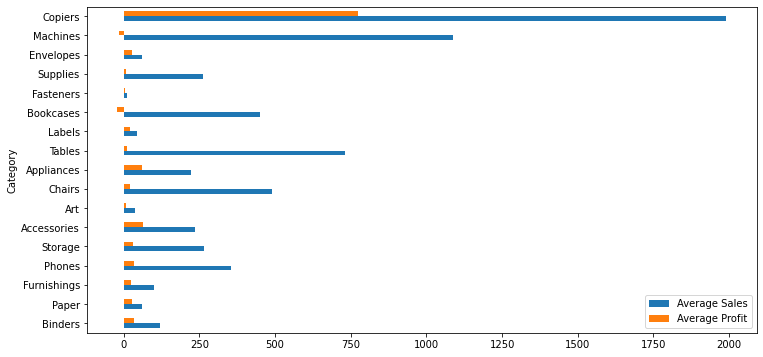

In [ ]:
table[['Average Sales','Average Profit']].plot.barh(figsize=(12,6))

<AxesSubplot:ylabel='Category'>

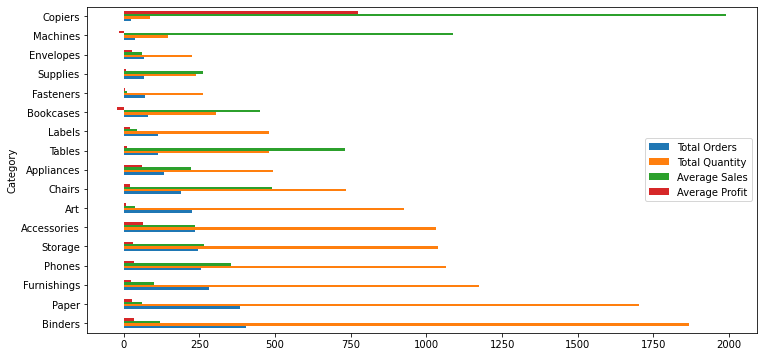

In [ ]:
table.plot.barh(figsize=(12,6))

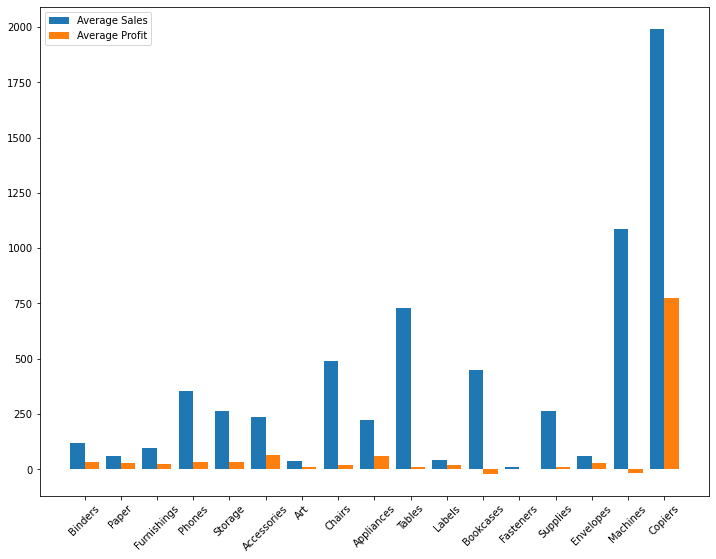

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))

x_axis = np.arange(len(table.index))

plt.bar(x_axis-0.2 , height = table['Average Sales'], width = 0.4 , label='Average Sales')
plt.bar(x_axis+0.2 , height = table['Average Profit'], width = 0.4 ,label='Average Profit')

plt.xticks(x_axis,table.index , rotation=45)

plt.legend()
plt.show()

* Number of Orders from each state..

In [ ]:
df.head()

,Order ID,Order Date,Ship Date,processing_time,O_day,O_month,O_Year,O_quarter,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,2013-06-13,2013-06-17,4,13,6,2013,Q2,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,2011-06-09,2011-06-14,5,9,6,2011,Q2,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,2011-06-09,2011-06-14,5,9,6,2011,Q2,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97
3,CA-2011-115812,2011-06-09,2011-06-14,5,9,6,2011,Q2,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,CA-2011-115812,2011-06-09,2011-06-14,5,9,6,2011,Q2,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78


In [ ]:
df['State'].value_counts()

California    2001
Washington     506
Arizona        224
Colorado       182
Oregon         124
Utah            53
Nevada          39
New Mexico      37
Idaho           21
Montana         15
Wyoming          1
Name: State, dtype: int64

* Total orders, Total Quantity, Average Sales & Average Profit from eac state

In [ ]:
table = pd.pivot_table(data=df,
                       values=['Order ID','Quantity','Sales','Profit'],
                       index='State',
                       aggfunc = {'Order ID' : pd.Series.nunique,
                                  'Quantity' : np.sum,
                                  'Sales' : np.mean,
                                  'Profit' : np.mean})

table = table.rename(columns = {'Order ID' : 'Total Orders',
                                'Profit' : 'Average Profit',
                                'Sales' : 'Average Sales',
                                'Quantity' : 'Total Quantity'})

table = table.reindex(columns = ['Total Orders','Total Quantity','Average Sales',
                                 'Average Profit'])

table = table.sort_values(by='Total Quantity' , ascending=False)

table.head()

,Total Orders,Total Quantity,Average Sales,Average Profit
State,,,,
California,1021,7665.0,228.729475,38.171714
Washington,256,1883.0,273.994644,66.013241
Arizona,108,862.0,157.509018,-15.302991
Colorado,79,693.0,176.418242,-35.867363
Oregon,56,499.0,140.573710,-9.600645


<AxesSubplot:ylabel='State'>

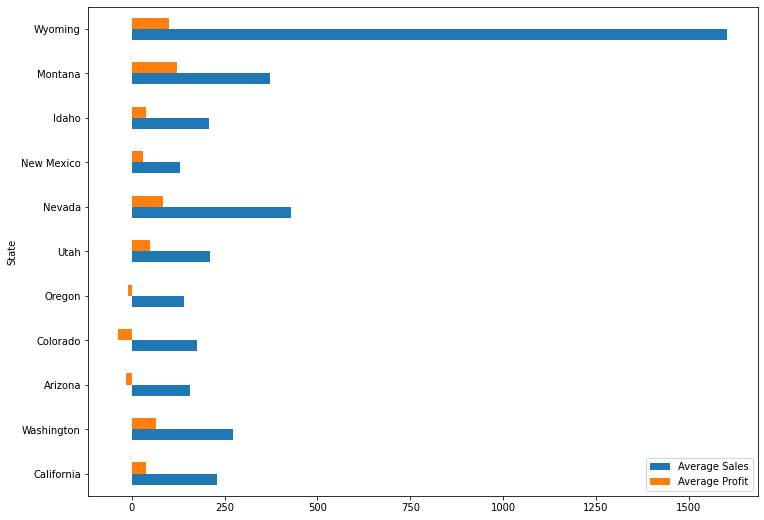

In [ ]:
table[['Average Sales','Average Profit']].plot.barh(figsize=(12,9))

* Total Quantity sold from each category in each state

In [ ]:
df['Category'].unique()

array(['Labels', 'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances',
       'Tables', 'Storage', 'Accessories', 'Paper', 'Chairs', 'Fasteners',
       'Supplies', 'Envelopes', 'Copiers', 'Bookcases', 'Machines'],
      dtype=object)

In [ ]:
df['State'].unique()

array(['California', 'Washington', 'Utah', 'Arizona', 'Oregon',
       'Colorado', 'New Mexico', 'Nevada', 'Montana', 'Idaho', 'Wyoming'],
      dtype=object)

In [ ]:
df.groupby(['State' , 'Category'])['Quantity'].sum()

State       Category   
Arizona     Accessories     85.0
            Appliances      21.0
            Art             47.0
            Binders        155.0
            Bookcases       18.0
                           ...  
Washington  Phones         116.0
            Storage        182.0
            Supplies        30.0
            Tables         109.0
Wyoming     Chairs           4.0
Name: Quantity, Length: 141, dtype: float64

In [ ]:
df.groupby(['State' , 'Category'])['Quantity'].sum().unstack().fillna(0)

Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
State,,,,,,,,,,,,,,,,,
Arizona,85.0,21.0,47.0,155.0,18.0,52.0,0.0,28.0,23.0,82.0,9.0,9.0,124.0,79.0,78.0,16.0,36.0
California,568.0,346.0,644.0,1057.0,198.0,466.0,60.0,149.0,148.0,751.0,349.0,86.0,1091.0,689.0,637.0,145.0,281.0
Colorado,76.0,38.0,32.0,112.0,41.0,53.0,1.0,16.0,12.0,92.0,5.0,13.0,64.0,59.0,51.0,14.0,14.0
Idaho,3.0,4.0,0.0,12.0,0.0,3.0,0.0,0.0,0.0,10.0,0.0,0.0,13.0,9.0,5.0,0.0,5.0
Montana,6.0,0.0,0.0,6.0,0.0,0.0,5.0,0.0,0.0,7.0,2.0,0.0,5.0,7.0,18.0,0.0,0.0
Nevada,5.0,9.0,16.0,32.0,2.0,3.0,0.0,0.0,1.0,22.0,3.0,10.0,27.0,18.0,5.0,5.0,10.0
New Mexico,23.0,0.0,17.0,16.0,0.0,7.0,0.0,5.0,0.0,12.0,5.0,0.0,28.0,18.0,17.0,3.0,0.0
Oregon,49.0,17.0,51.0,70.0,9.0,27.0,0.0,10.0,8.0,15.0,36.0,8.0,79.0,50.0,32.0,20.0,18.0
Utah,19.0,3.0,10.0,43.0,10.0,0.0,5.0,0.0,7.0,11.0,10.0,0.0,53.0,21.0,14.0,5.0,8.0


In [ ]:
#State wise Number of orders for each category
df.groupby('State')['Category'].value_counts()

State       Category   
Arizona     Binders        35
            Paper          31
            Phones         23
            Accessories    22
            Furnishings    21
                           ..
Washington  Supplies        9
            Machines        7
            Envelopes       6
            Copiers         5
Wyoming     Chairs          1
Name: Category, Length: 141, dtype: int64

* Category wise profit from each state..

In [ ]:
table_state_category_profit = df.groupby(['State','Category'])['Profit'].sum().unstack().fillna(0)
table_state_category_profit

Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
State,,,,,,,,,,,,,,,,,
Arizona,224.77,83.25,140.94,-1646.73,-869.21,121.63,0.00,75.15,2.09,284.56,9.12,-930.95,842.04,818.71,-271.16,-30.19,-2281.89
California,11095.68,6992.27,1614.87,10002.16,1418.98,2435.97,7889.85,1529.39,195.76,5611.54,1370.08,4175.40,7977.42,6309.30,7204.27,862.24,-303.58
Colorado,224.56,141.40,25.11,-379.51,-2408.90,556.52,165.00,27.05,12.62,144.12,5.99,-4384.26,298.60,523.12,-212.70,-291.69,-974.89
Idaho,37.79,66.07,0.00,24.64,0.00,4.23,0.00,0.00,0.00,110.03,0.00,0.00,81.32,54.31,28.63,0.00,419.71
Montana,91.32,0.00,0.00,157.40,0.00,0.00,1379.98,0.00,0.00,21.75,6.87,0.00,19.32,51.74,104.94,0.00,0.00
Nevada,89.43,27.21,59.59,1768.43,41.17,-109.58,0.00,0.00,0.00,155.79,6.87,179.73,153.59,243.69,238.65,25.00,437.19
New Mexico,264.34,0.00,119.31,45.08,0.00,119.59,0.00,13.35,0.00,132.01,8.67,0.00,298.95,72.95,78.15,4.73,0.00
Oregon,152.14,54.10,65.28,-198.77,-616.82,106.11,0.00,18.02,0.17,72.02,320.33,-273.94,324.07,248.16,-410.77,-1.68,-1048.90
Utah,41.32,305.13,28.87,262.27,218.27,0.00,449.99,0.00,2.53,54.58,14.62,0.00,553.42,90.43,153.78,12.43,358.92


<AxesSubplot:ylabel='State'>

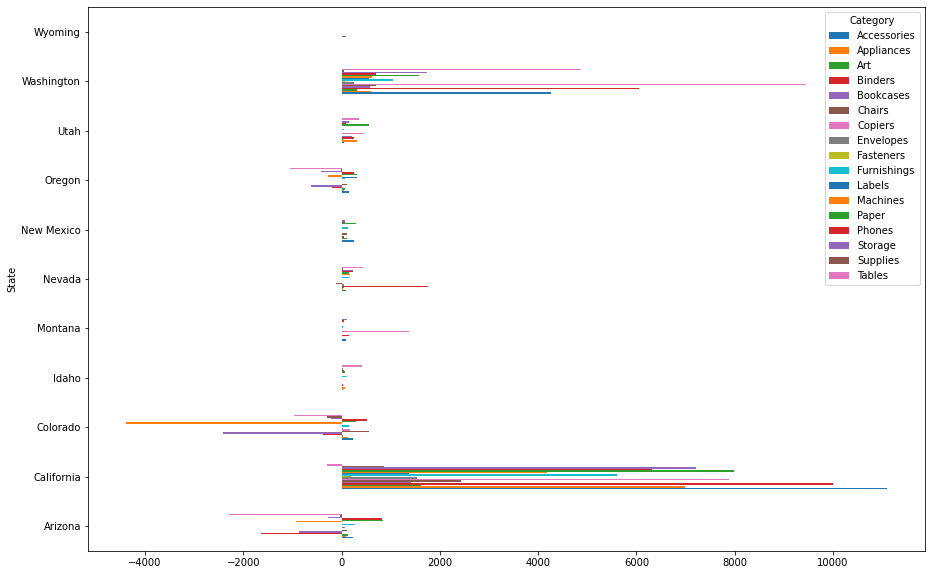

In [ ]:
table_state_category_profit.plot.barh(figsize=(15,10))

In [ ]:
table_state_category_profit.columns

Index(['Accessories', 'Appliances', 'Art', 'Binders', 'Bookcases', 'Chairs',
       'Copiers', 'Envelopes', 'Fasteners', 'Furnishings', 'Labels',
       'Machines', 'Paper', 'Phones', 'Storage', 'Supplies', 'Tables'],
      dtype='object', name='Category')

In [ ]:
table_state_category_profit.index

Index(['Arizona', 'California', 'Colorado', 'Idaho', 'Montana', 'Nevada',
       'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming'],
      dtype='object', name='State')

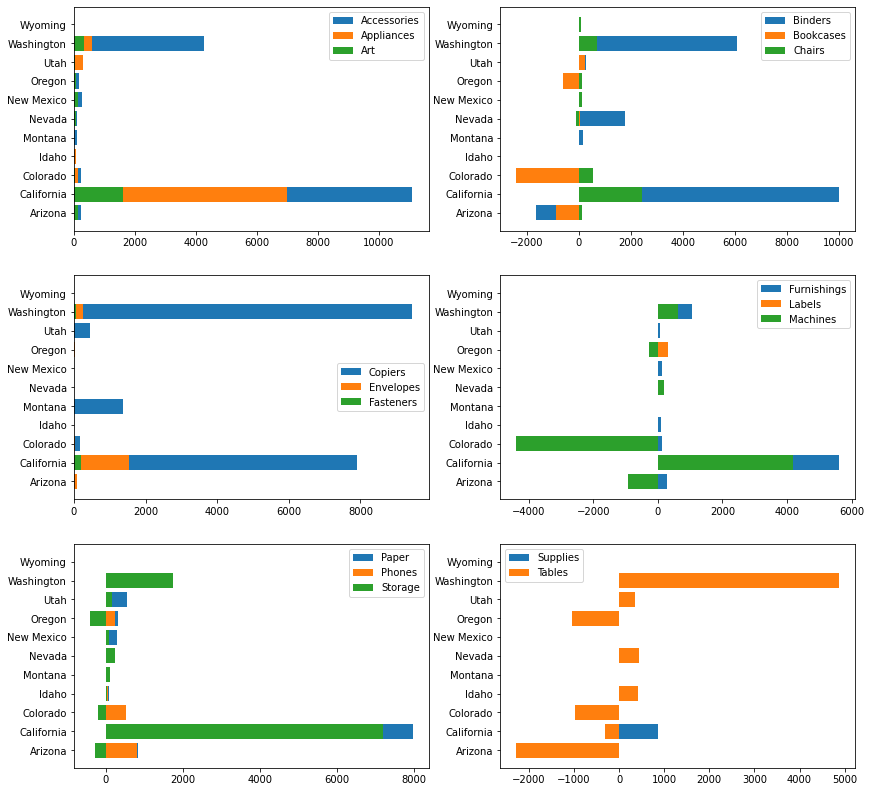

In [ ]:
import matplotlib.pyplot as plt

x = table_state_category_profit.index
y = table_state_category_profit[['Accessories', 'Appliances', 'Art', 'Binders',
                                 'Bookcases', 'Chairs','Copiers', 'Envelopes',
                                 'Fasteners', 'Furnishings', 'Labels','Machines',
                                 'Paper', 'Phones', 'Storage', 'Supplies', 'Tables']]

plt.figure(figsize = (14,14))

plt.subplot(3,2,1)
plt.barh(x,y.Accessories, label = 'Accessories')
plt.barh(x,y.Appliances, label = 'Appliances')
plt.barh(x,y.Art, label = 'Art')
plt.legend()

plt.subplot(3,2,2)
plt.barh(x,y.Binders, label = 'Binders')
plt.barh(x,y.Bookcases, label = 'Bookcases')
plt.barh(x,y.Chairs, label = 'Chairs')
plt.legend()

plt.subplot(3,2,3)
plt.barh(x,y.Copiers, label = 'Copiers')
plt.barh(x,y.Envelopes, label = 'Envelopes')
plt.barh(x,y.Fasteners, label = 'Fasteners')
plt.legend()

plt.subplot(3,2,4)
plt.barh(x,y.Furnishings,  label = 'Furnishings')
plt.barh(x,y.Labels, label = 'Labels')
plt.barh(x,y.Machines, label = 'Machines')
plt.legend()

plt.subplot(3,2,5)
plt.barh(x,y.Paper,  label = 'Paper')
plt.barh(x,y.Phones, label = 'Phones')
plt.barh(x,y.Storage, label = 'Storage')
plt.legend()

plt.subplot(3,2,6)
plt.barh(x,y.Supplies,  label = 'Supplies')
plt.barh(x,y.Tables, label = 'Tables')
plt.legend()

plt.show()

* 1st Order date in each State

In [ ]:
df.groupby('State')['Order Date'].min()

State
Arizona      2011-01-20
California   2011-01-07
Colorado     2011-03-10
Idaho        2011-04-11
Montana      2011-04-11
Nevada       2011-01-24
New Mexico   2011-03-28
Oregon       2011-01-19
Utah         2011-03-14
Washington   2011-02-04
Wyoming      2013-11-08
Name: Order Date, dtype: datetime64[ns]

* Total profit and Sales earned in each state

In [ ]:
sales_df = df.groupby('State', as_index=False)['Sales','Profit'].sum()
sales_df = sales_df.sort_values('Sales' , ascending = False)
sales_df

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,State,Sales,Profit
1,California,457687.68,76381.60
9,Washington,138641.29,33402.70
0,Arizona,35282.02,-3427.87
2,Colorado,32108.12,-6527.86
7,Oregon,17431.14,-1190.48
5,Nevada,16729.10,3316.76
8,Utah,11220.06,2546.56
4,Montana,5589.35,1833.32
6,New Mexico,4783.54,1157.13
3,Idaho,4382.49,826.73


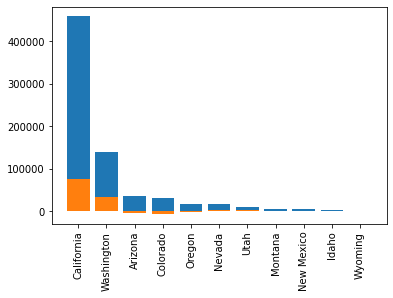

In [ ]:
import matplotlib.pyplot as plt

plt.bar(x = sales_df.State , height = sales_df.Sales)
plt.bar(x = sales_df.State , height = sales_df.Profit)

plt.xticks(rotation=90)

plt.show()

* melt function in pandas

In [ ]:
melted_sales = pd.melt(sales_df , id_vars = 'State' , value_vars=['Sales','Profit'],
                       var_name='Metric' , value_name='Amount')
melted_sales

,State,Metric,Amount
0,California,Sales,457687.68
1,Washington,Sales,138641.29
2,Arizona,Sales,35282.02
3,Colorado,Sales,32108.12
4,Oregon,Sales,17431.14
5,Nevada,Sales,16729.10
6,Utah,Sales,11220.06
7,Montana,Sales,5589.35
8,New Mexico,Sales,4783.54
9,Idaho,Sales,4382.49


<AxesSubplot:xlabel='Amount', ylabel='State'>

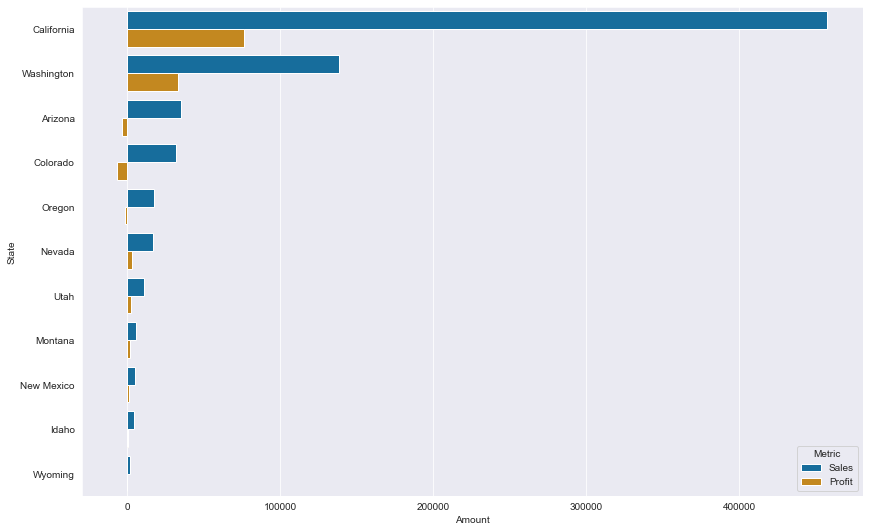

In [ ]:
import seaborn as sns

plt.figure(figsize=(14,9))
sns.set_style('darkgrid')
sns.barplot(data=melted_sales , x = 'Amount' , y = 'State' , hue='Metric',
            palette='colorblind')

In [ ]:
table_state_category_quantity = df.groupby(['State','Category'])['Quantity'].sum().unstack().fillna(0)
table_state_category_quantity

Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
State,,,,,,,,,,,,,,,,,
Arizona,85.0,21.0,47.0,155.0,18.0,52.0,0.0,28.0,23.0,82.0,9.0,9.0,124.0,79.0,78.0,16.0,36.0
California,568.0,346.0,644.0,1057.0,198.0,466.0,60.0,149.0,148.0,751.0,349.0,86.0,1091.0,689.0,637.0,145.0,281.0
Colorado,76.0,38.0,32.0,112.0,41.0,53.0,1.0,16.0,12.0,92.0,5.0,13.0,64.0,59.0,51.0,14.0,14.0
Idaho,3.0,4.0,0.0,12.0,0.0,3.0,0.0,0.0,0.0,10.0,0.0,0.0,13.0,9.0,5.0,0.0,5.0
Montana,6.0,0.0,0.0,6.0,0.0,0.0,5.0,0.0,0.0,7.0,2.0,0.0,5.0,7.0,18.0,0.0,0.0
Nevada,5.0,9.0,16.0,32.0,2.0,3.0,0.0,0.0,1.0,22.0,3.0,10.0,27.0,18.0,5.0,5.0,10.0
New Mexico,23.0,0.0,17.0,16.0,0.0,7.0,0.0,5.0,0.0,12.0,5.0,0.0,28.0,18.0,17.0,3.0,0.0
Oregon,49.0,17.0,51.0,70.0,9.0,27.0,0.0,10.0,8.0,15.0,36.0,8.0,79.0,50.0,32.0,20.0,18.0
Utah,19.0,3.0,10.0,43.0,10.0,0.0,5.0,0.0,7.0,11.0,10.0,0.0,53.0,21.0,14.0,5.0,8.0


In [ ]:
list(table_state_category_quantity.iterrows())

[('Arizona',
  Category
  Accessories     85.0
  Appliances      21.0
  Art             47.0
  Binders        155.0
  Bookcases       18.0
  Chairs          52.0
  Copiers          0.0
  Envelopes       28.0
  Fasteners       23.0
  Furnishings     82.0
  Labels           9.0
  Machines         9.0
  Paper          124.0
  Phones          79.0
  Storage         78.0
  Supplies        16.0
  Tables          36.0
  Name: Arizona, dtype: float64),
 ('California',
  Category
  Accessories     568.0
  Appliances      346.0
  Art             644.0
  Binders        1057.0
  Bookcases       198.0
  Chairs          466.0
  Copiers          60.0
  Envelopes       149.0
  Fasteners       148.0
  Furnishings     751.0
  Labels          349.0
  Machines         86.0
  Paper          1091.0
  Phones          689.0
  Storage         637.0
  Supplies        145.0
  Tables          281.0
  Name: California, dtype: float64),
 ('Colorado',
  Category
  Accessories     76.0
  Appliances      38.0
  Art   

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


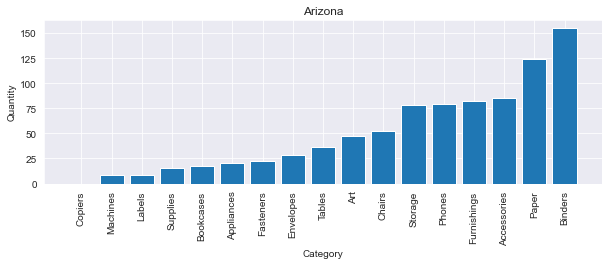

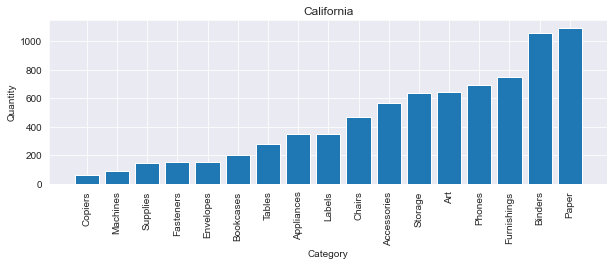

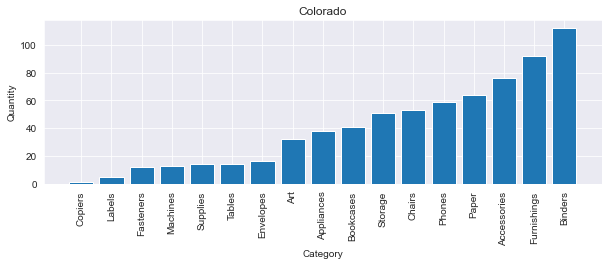

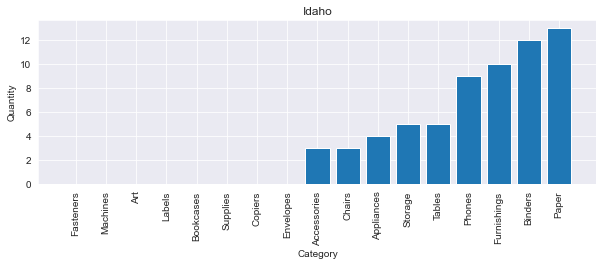

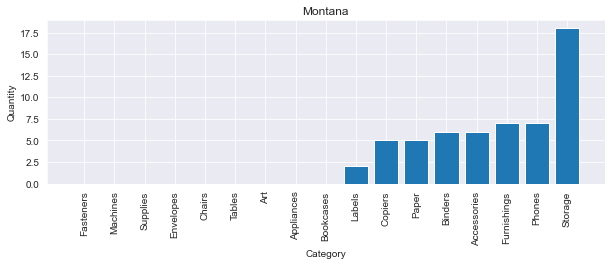

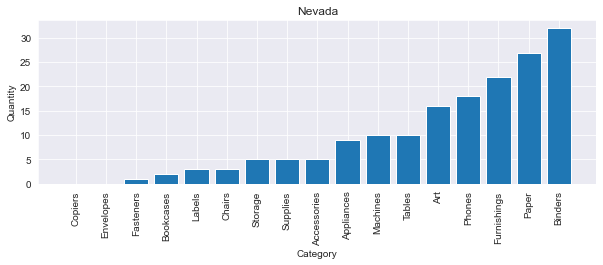

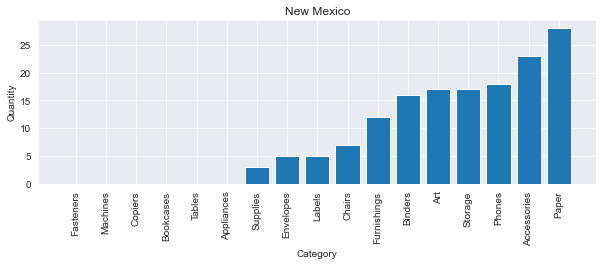

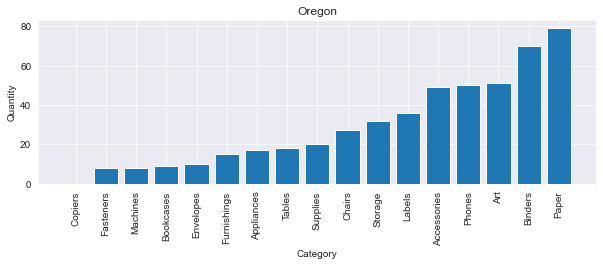

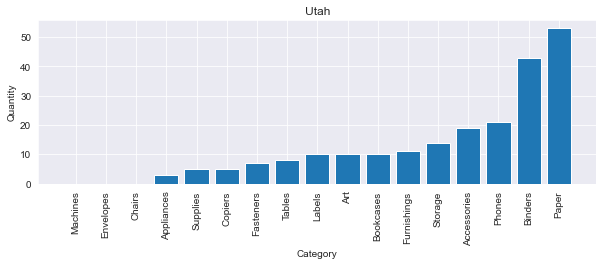

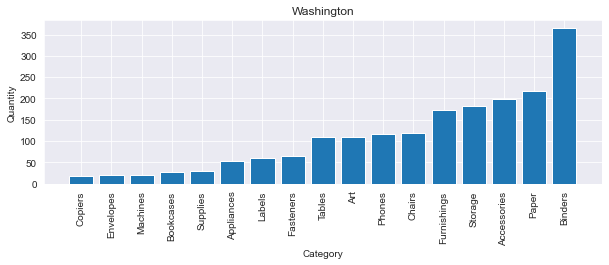

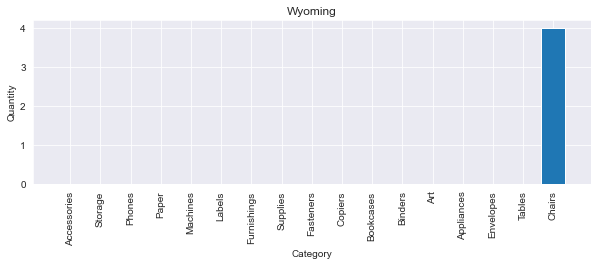

In [ ]:
for state,data in table_state_category_quantity.iterrows():
    #print(data.sort_values())
    data = data.sort_values()
    fig,ax = plt.subplots(figsize=(10,3))
    ax.bar(x = data.index , height = data.values)
    ax.set_title(state)
    ax.set_xlabel('Category')
    ax.set_ylabel('Quantity')
    ax.set_xticklabels(labels=data.index , rotation = 90)
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


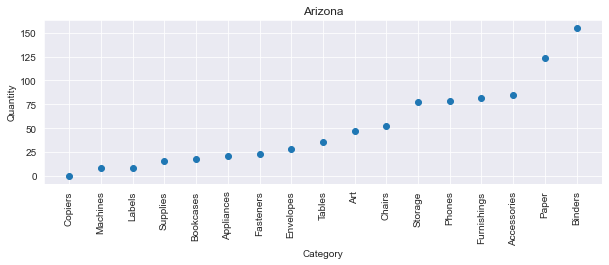

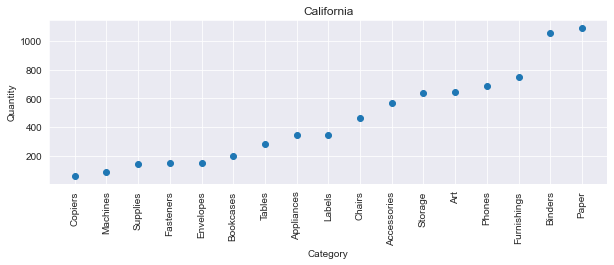

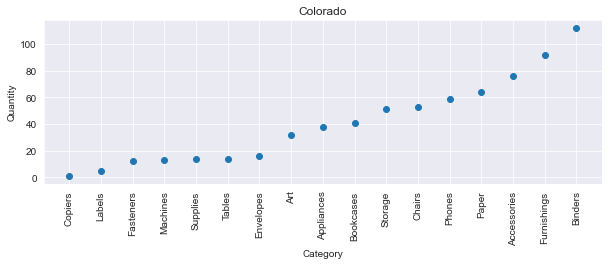

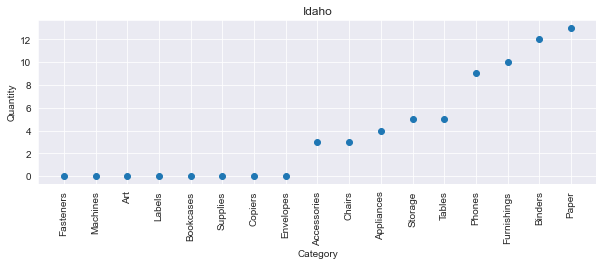

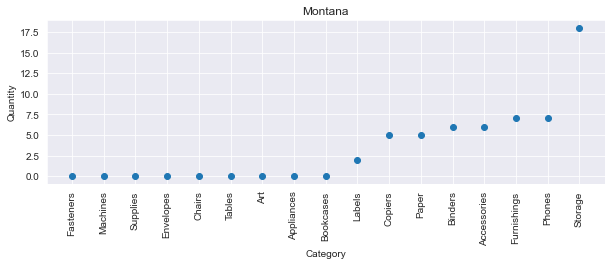

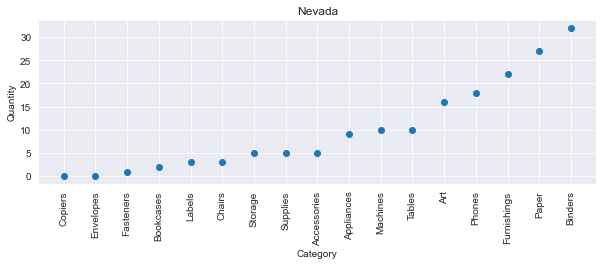

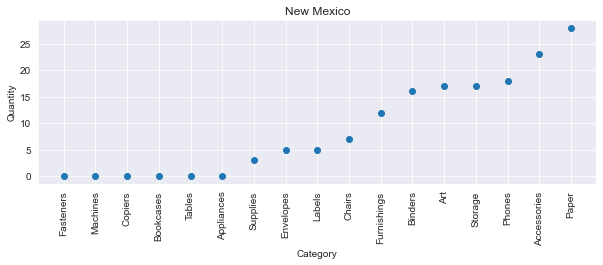

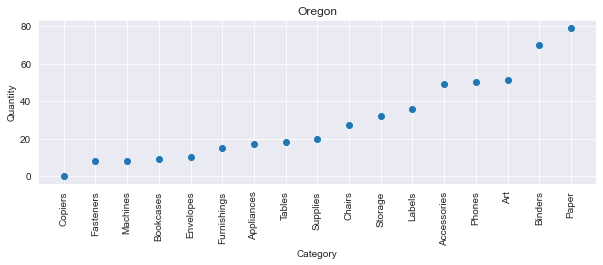

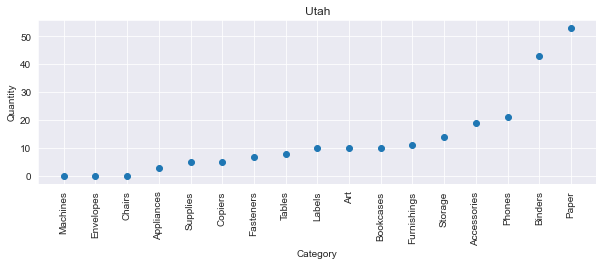

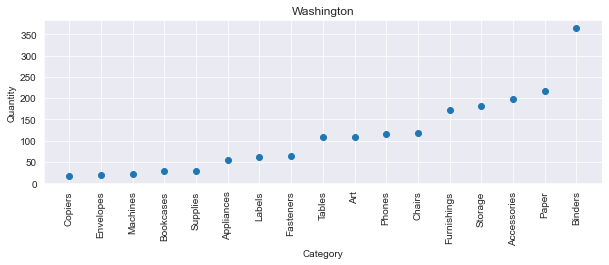

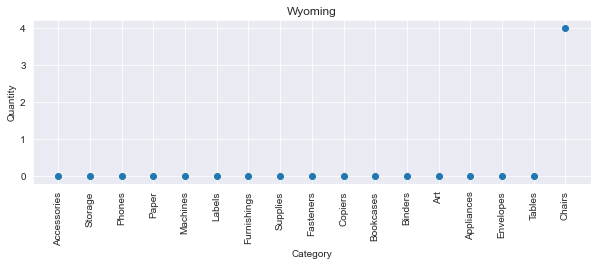

In [ ]:
for state,data in table_state_category_quantity.iterrows():
    #print(data.sort_values())
    data = data.sort_values()
    fig,ax = plt.subplots(figsize=(10,3))
    #ax.plot(data.values)
    ax.scatter(x = data.index , y = data.values)
    ax.set_title(state)
    ax.set_xlabel('Category')
    ax.set_ylabel('Quantity')
    ax.set_xticklabels(labels=data.index , rotation = 90)
    plt.show()

In [ ]:
table_state_category_profit = df.groupby(['State','Category'])['Profit'].sum().unstack().fillna(0)
table_state_category_profit

Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
State,,,,,,,,,,,,,,,,,
Arizona,224.77,83.25,140.94,-1646.73,-869.21,121.63,0.00,75.15,2.09,284.56,9.12,-930.95,842.04,818.71,-271.16,-30.19,-2281.89
California,11095.68,6992.27,1614.87,10002.16,1418.98,2435.97,7889.85,1529.39,195.76,5611.54,1370.08,4175.40,7977.42,6309.30,7204.27,862.24,-303.58
Colorado,224.56,141.40,25.11,-379.51,-2408.90,556.52,165.00,27.05,12.62,144.12,5.99,-4384.26,298.60,523.12,-212.70,-291.69,-974.89
Idaho,37.79,66.07,0.00,24.64,0.00,4.23,0.00,0.00,0.00,110.03,0.00,0.00,81.32,54.31,28.63,0.00,419.71
Montana,91.32,0.00,0.00,157.40,0.00,0.00,1379.98,0.00,0.00,21.75,6.87,0.00,19.32,51.74,104.94,0.00,0.00
Nevada,89.43,27.21,59.59,1768.43,41.17,-109.58,0.00,0.00,0.00,155.79,6.87,179.73,153.59,243.69,238.65,25.00,437.19
New Mexico,264.34,0.00,119.31,45.08,0.00,119.59,0.00,13.35,0.00,132.01,8.67,0.00,298.95,72.95,78.15,4.73,0.00
Oregon,152.14,54.10,65.28,-198.77,-616.82,106.11,0.00,18.02,0.17,72.02,320.33,-273.94,324.07,248.16,-410.77,-1.68,-1048.90
Utah,41.32,305.13,28.87,262.27,218.27,0.00,449.99,0.00,2.53,54.58,14.62,0.00,553.42,90.43,153.78,12.43,358.92


In [ ]:
list(table_state_category_profit.iterrows())

[('Arizona',
  Category
  Accessories     224.77
  Appliances       83.25
  Art             140.94
  Binders       -1646.73
  Bookcases      -869.21
  Chairs          121.63
  Copiers           0.00
  Envelopes        75.15
  Fasteners         2.09
  Furnishings     284.56
  Labels            9.12
  Machines       -930.95
  Paper           842.04
  Phones          818.71
  Storage        -271.16
  Supplies        -30.19
  Tables        -2281.89
  Name: Arizona, dtype: float64),
 ('California',
  Category
  Accessories    11095.68
  Appliances      6992.27
  Art             1614.87
  Binders        10002.16
  Bookcases       1418.98
  Chairs          2435.97
  Copiers         7889.85
  Envelopes       1529.39
  Fasteners        195.76
  Furnishings     5611.54
  Labels          1370.08
  Machines        4175.40
  Paper           7977.42
  Phones          6309.30
  Storage         7204.27
  Supplies         862.24
  Tables          -303.58
  Name: California, dtype: float64),
 ('Colorado

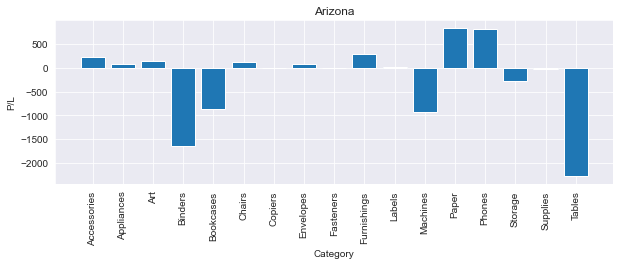

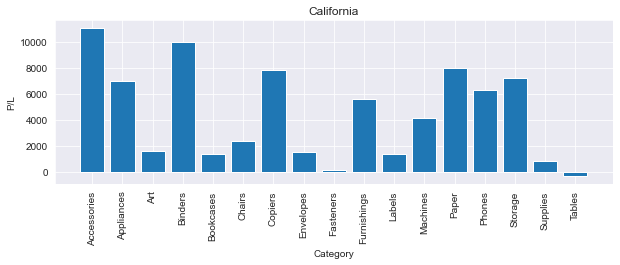

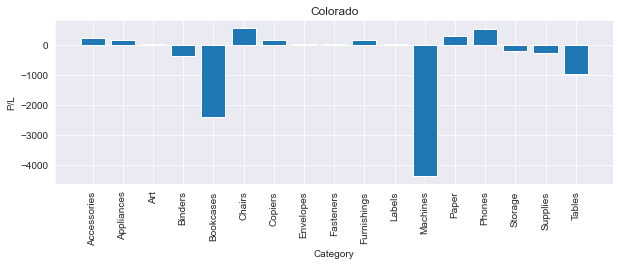

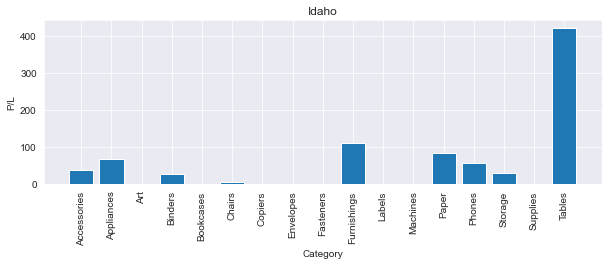

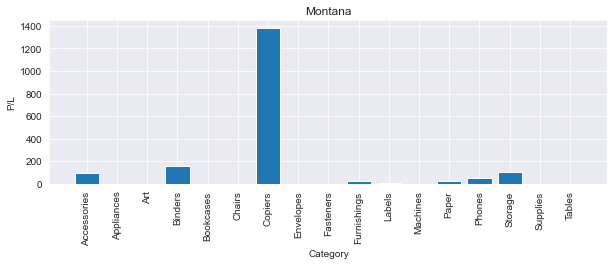

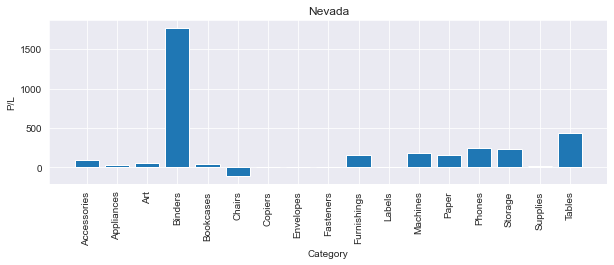

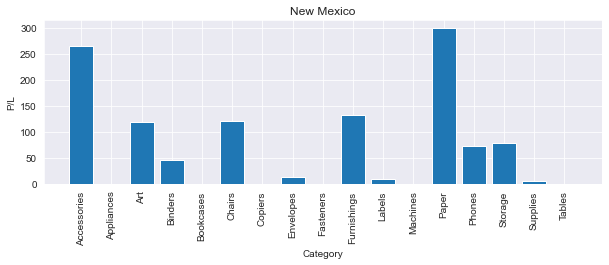

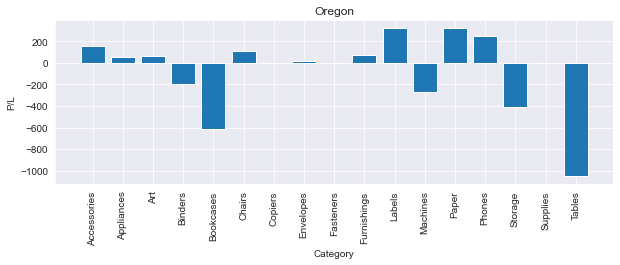

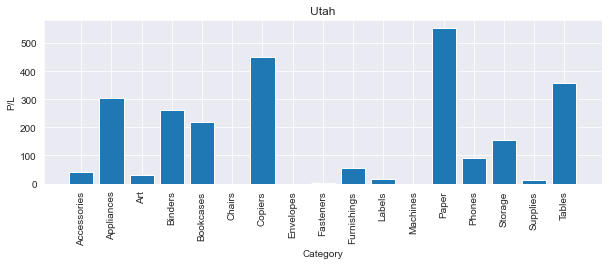

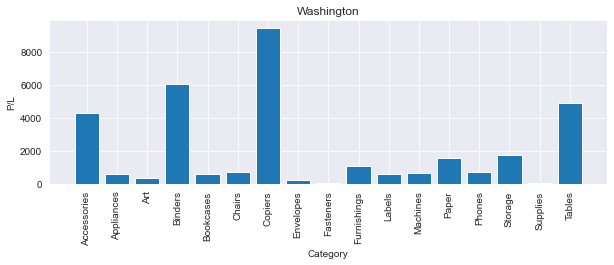

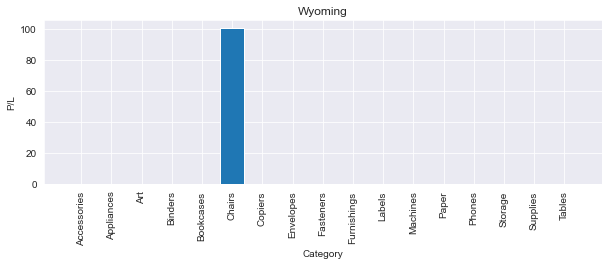

In [ ]:
for state,data in table_state_category_profit.iterrows():
    #print(state)
    #print(data.values)
    #print(data.index)
    fig,ax = plt.subplots(figsize=(10,3))
    ax.bar(x=data.index , height=data.values)
    ax.set_title(state)
    ax.set_xlabel('Category')
    ax.set_ylabel('P/L')
    plt.xticks(rotation=90)
    plt.show()

* **What is the average time each state is taking to deliver a product**

In [ ]:
df.head()

,Order ID,Order Date,Ship Date,processing_time,O_day,O_month,O_Year,O_quarter,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,2013-06-13,2013-06-17,4,13,6,2013,Q2,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,2011-06-09,2011-06-14,5,9,6,2011,Q2,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,2011-06-09,2011-06-14,5,9,6,2011,Q2,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97
3,CA-2011-115812,2011-06-09,2011-06-14,5,9,6,2011,Q2,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,CA-2011-115812,2011-06-09,2011-06-14,5,9,6,2011,Q2,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78


In [ ]:
state_pt = df.groupby('State')['processing_time'].mean().sort_values(ascending=False)
state_pt

State
Wyoming       5.000000
Montana       4.600000
New Mexico    4.513514
Nevada        4.384615
Utah          4.358491
Oregon        4.314516
Arizona       4.071429
Washington    3.974308
California    3.868066
Colorado      3.681319
Idaho         3.666667
Name: processing_time, dtype: float64

<AxesSubplot:ylabel='State'>

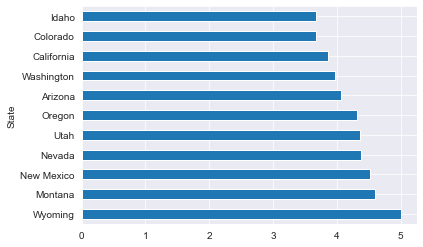

In [ ]:
state_pt.plot.barh()

In [ ]:
state_pt = state_pt.reset_index()
state_pt

,State,processing_time
0,Wyoming,5.000000
1,Montana,4.600000
2,New Mexico,4.513514
3,Nevada,4.384615
4,Utah,4.358491
5,Oregon,4.314516
6,Arizona,4.071429
7,Washington,3.974308
8,California,3.868066
9,Colorado,3.681319


<AxesSubplot:xlabel='processing_time', ylabel='State'>

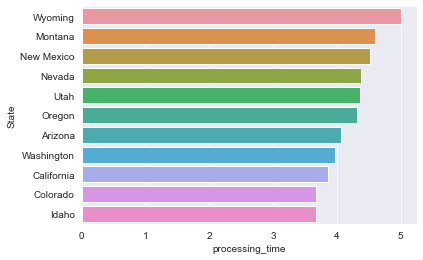

In [ ]:
sns.barplot(data = state_pt , y = 'State', x = 'processing_time')

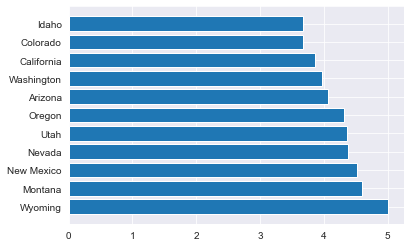

In [ ]:
#plt.bar(x = state_pt['State'] , height=state_pt['processing_time'])
plt.barh(y = state_pt['State'] , width=state_pt['processing_time'])
plt.show()

* Variation in Sales values because of processing time

In [ ]:
df['processing_time'].unique()

array([4, 5, 2, 6, 3, 7, 1, 0])

In [ ]:
df_pt_sales = df.groupby(['processing_time'])['Sales'].mean().reset_index()
df_pt_sales

,processing_time,Sales
0,0,243.957952
1,1,215.525597
2,2,308.873756
3,3,183.375130
4,4,212.077885
5,5,193.275965
6,6,227.317618
7,7,266.983235


<AxesSubplot:xlabel='processing_time', ylabel='Sales'>

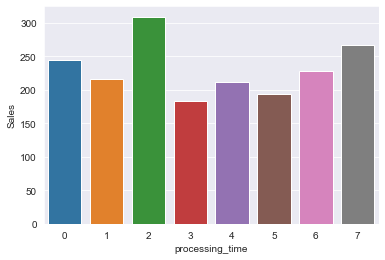

In [ ]:
sns.barplot(data = df_pt_sales , x = 'processing_time', y = 'Sales')

* Variation in Sales values because of processing time for each state

In [ ]:
sales_state_pt = df.groupby(['State','processing_time'])['Sales'].mean().unstack().fillna(0)
sales_state_pt

processing_time,0,1,2,3,4,5,6,7
State,,,,,,,,
Arizona,171.087333,163.099000,112.056667,126.085789,169.677907,161.513793,198.902000,141.906129
California,252.891667,217.188061,305.580172,211.159947,209.327898,194.497986,227.315962,268.310472
Colorado,266.632500,107.226667,154.279655,98.477568,196.790426,86.137917,343.515909,394.754286
Idaho,0.000000,0.000000,192.135714,89.970000,243.355000,244.355000,21.310000,0.000000
Montana,8.290000,0.000000,0.000000,39.900000,187.116000,839.096000,0.000000,136.700000
Nevada,475.940000,568.723333,62.080000,96.327500,336.419000,960.190000,234.218333,629.284286
New Mexico,255.850000,159.990000,31.000000,0.000000,69.171000,137.716471,145.392000,545.850000
Oregon,0.000000,150.032500,159.660500,116.603077,141.439545,72.847931,206.364242,29.226667
Utah,48.960000,75.860000,465.662500,35.190000,280.551538,275.452941,54.424615,0.000000


In [ ]:
list(sales_state_pt.iterrows())

[('Arizona',
  processing_time
  0    171.087333
  1    163.099000
  2    112.056667
  3    126.085789
  4    169.677907
  5    161.513793
  6    198.902000
  7    141.906129
  Name: Arizona, dtype: float64),
 ('California',
  processing_time
  0    252.891667
  1    217.188061
  2    305.580172
  3    211.159947
  4    209.327898
  5    194.497986
  6    227.315962
  7    268.310472
  Name: California, dtype: float64),
 ('Colorado',
  processing_time
  0    266.632500
  1    107.226667
  2    154.279655
  3     98.477568
  4    196.790426
  5     86.137917
  6    343.515909
  7    394.754286
  Name: Colorado, dtype: float64),
 ('Idaho',
  processing_time
  0      0.000000
  1      0.000000
  2    192.135714
  3     89.970000
  4    243.355000
  5    244.355000
  6     21.310000
  7      0.000000
  Name: Idaho, dtype: float64),
 ('Montana',
  processing_time
  0      8.290
  1      0.000
  2      0.000
  3     39.900
  4    187.116
  5    839.096
  6      0.000
  7    136.700
  Name: M

In [ ]:
for state,data in sales_state_pt.iterrows():
    #print(state)
    #print(data.values)
    print(list(data.index))

[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7]


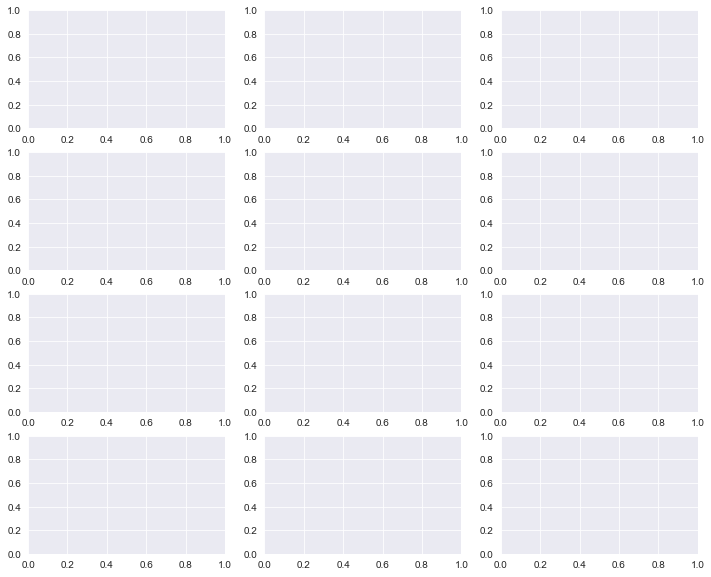

In [ ]:
#Create 11 Subplots
fig,axes = plt.subplots(4,3 , figsize=(12,10))
plt.show()

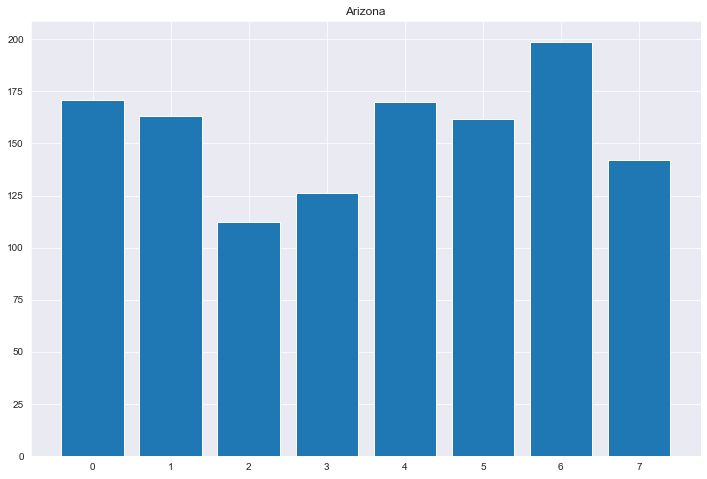

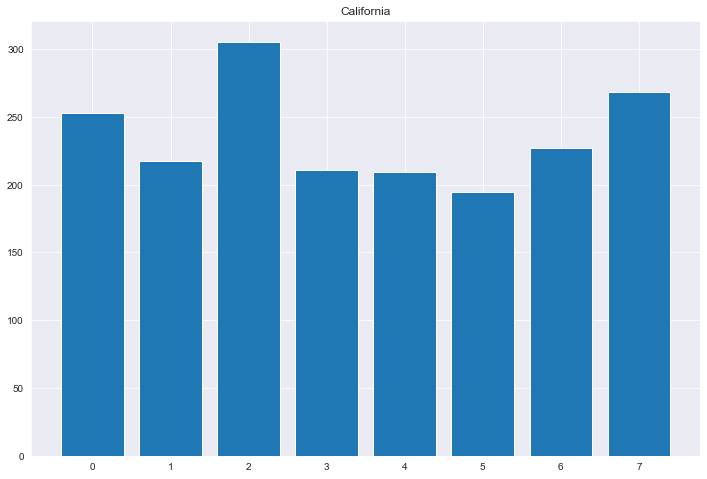

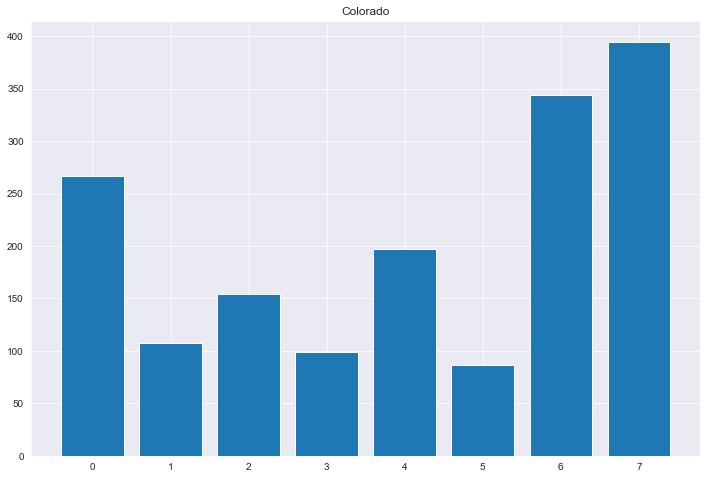

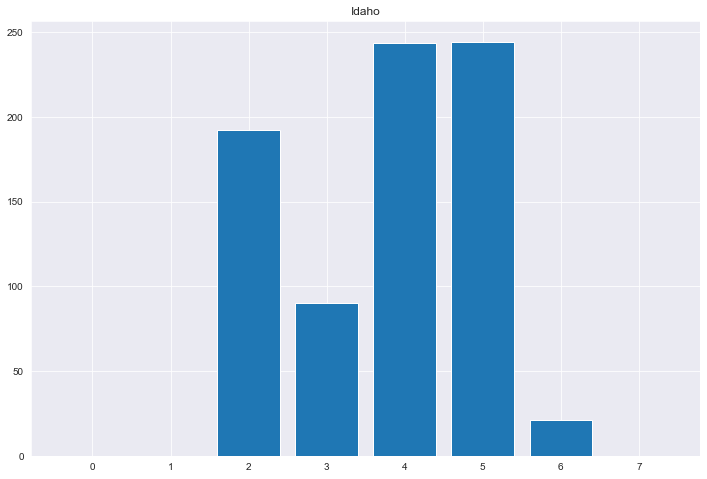

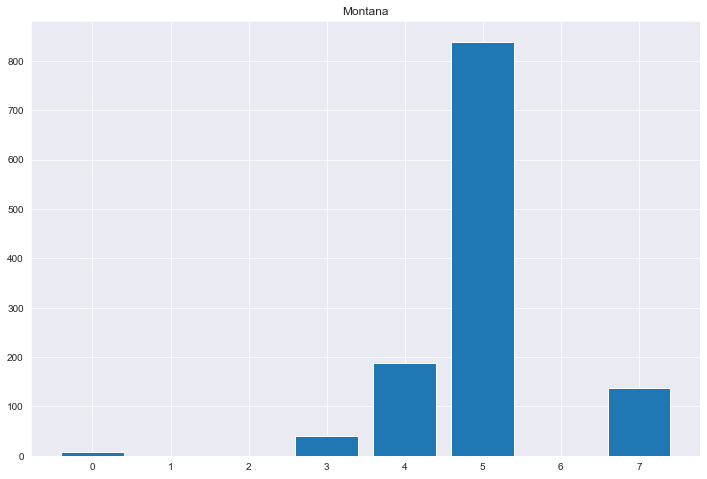

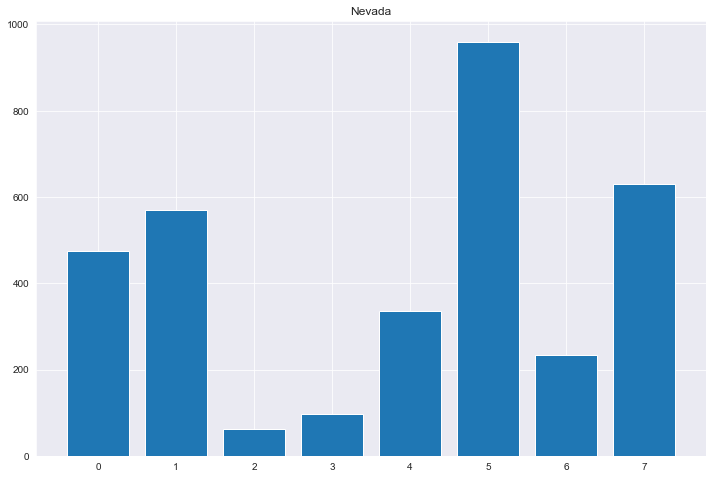

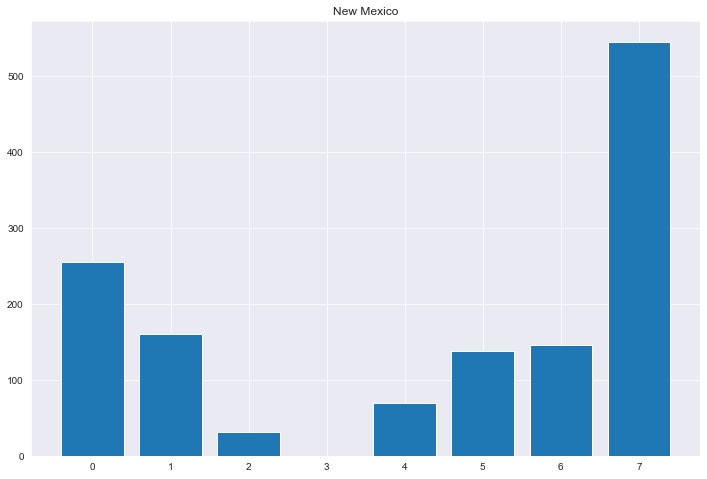

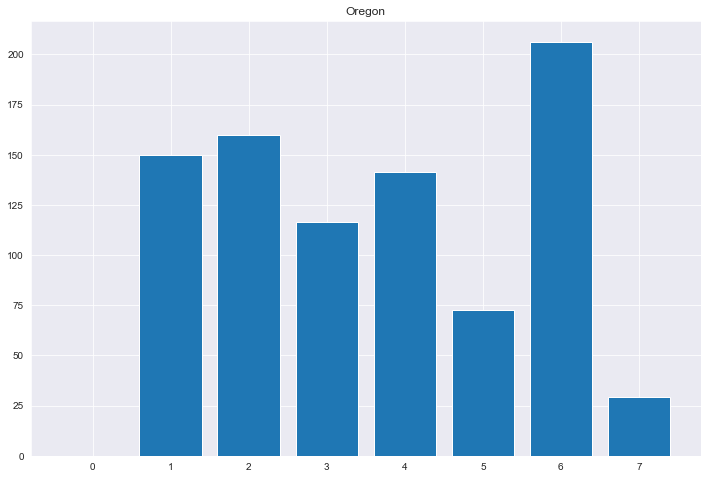

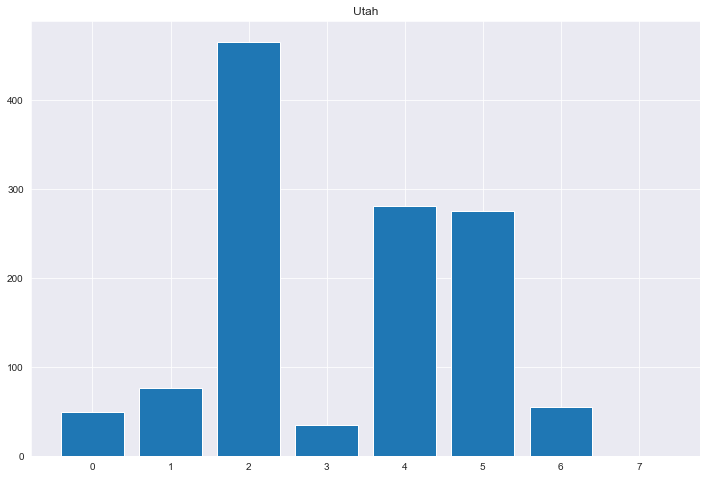

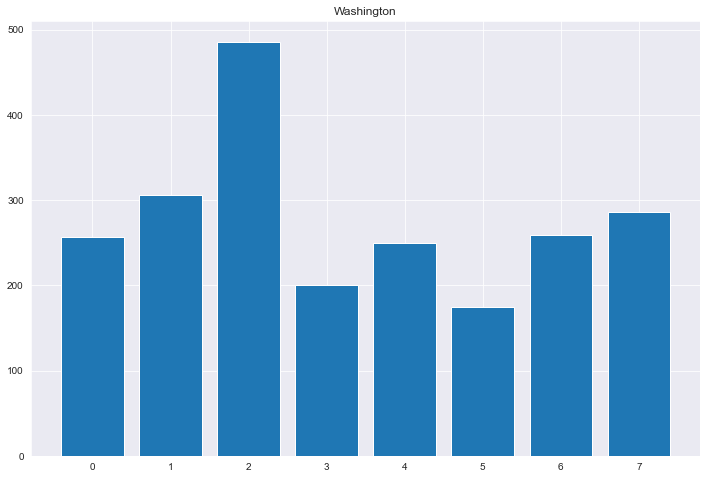

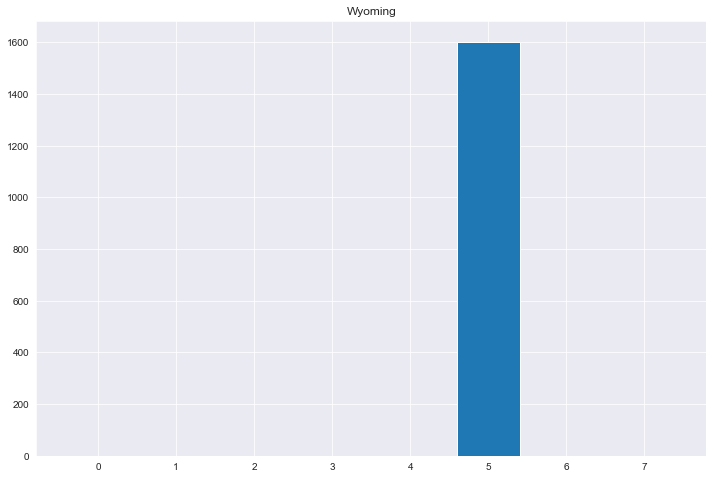

In [ ]:
for state,data in sales_state_pt.iterrows():
    #print(data)
    fig,ax = plt.subplots(figsize=(12,8))
    ax.bar(x=data.index , height = data.values )
    ax.set_title(state)
    plt.show()

In [ ]:
state_ship_df = df.groupby(['State','processing_time'] , as_index=False).sum()
state_ship_df.head()

,State,processing_time,O_day,O_month,O_Year,Sales,Quantity,Profit
0,Arizona,0,207,122,30198,2566.31,52.0,177.61
1,Arizona,1,279,125,40260,3261.98,98.0,-555.91
2,Arizona,2,330,178,36219,2017.02,59.0,-382.12
3,Arizona,3,177,154,38235,2395.63,66.0,181.15
4,Arizona,4,842,343,86526,7296.15,168.0,-328.94


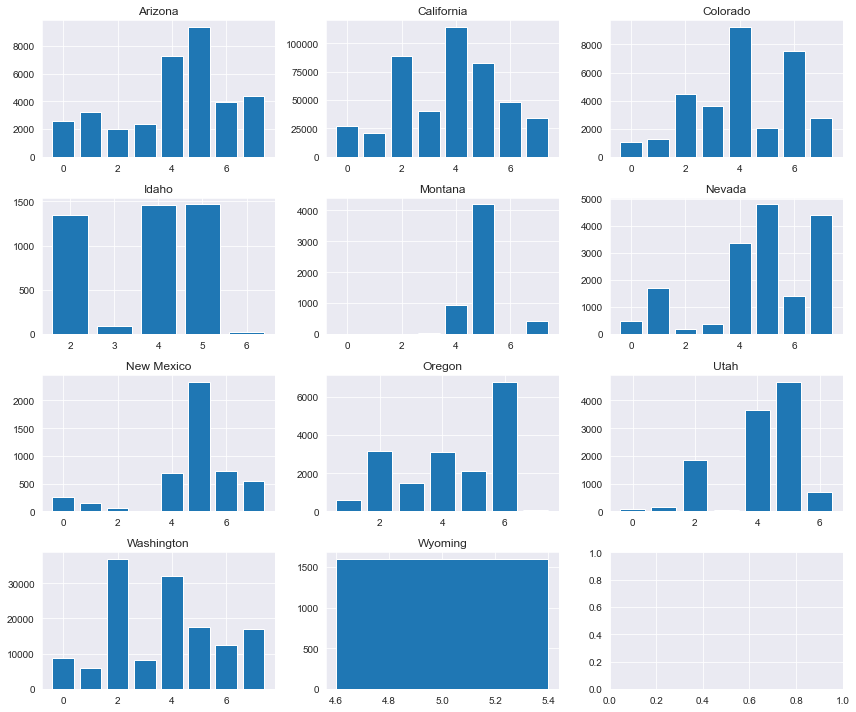

In [ ]:
state_ship_df = df.groupby(['State','processing_time'] , as_index=False).sum()

fig,axes = plt.subplots(4,3 , figsize=(12,10))

for i, state in enumerate(state_ship_df['State'].unique()):
    row = i // 3
    col = i % 3

    state_df = state_ship_df[state_ship_df['State'] == state]
    ax = axes[row,col]
    ax.bar(x=state_df['processing_time'] , height = state_df['Sales'] )
    ax.set_title(state)

plt.tight_layout()

* We can conclude that processing time has not much effect on Sales. So their might be other factors like population or number of stores in each state affecting the sales

In [ ]:
'''
fig,axes = plt.subplots(4,3 , figsize=(12,10))

for state,data in sales_state_pt.iterrows():
    #print(data)
    row = i // 3
    col = i % 3
    ax = axes[row,col]
    ax.bar(x=data.index , height = data.values)
    ax.set_title(state)
    plt.show()
'''

'\nfig,axes = plt.subplots(4,3 , figsize=(12,10))\n\nfor state,data in sales_state_pt.iterrows():\n    #print(data)\n    row = i // 3\n    col = i % 3\n    ax = axes[row,col]\n    ax.bar(x=data.index , height = data.values)\n    ax.set_title(state)\n    plt.show()\n'

**Let's see top 20 cities on the basis of AVerage sales and profit earn by them**

<AxesSubplot:ylabel='City'>

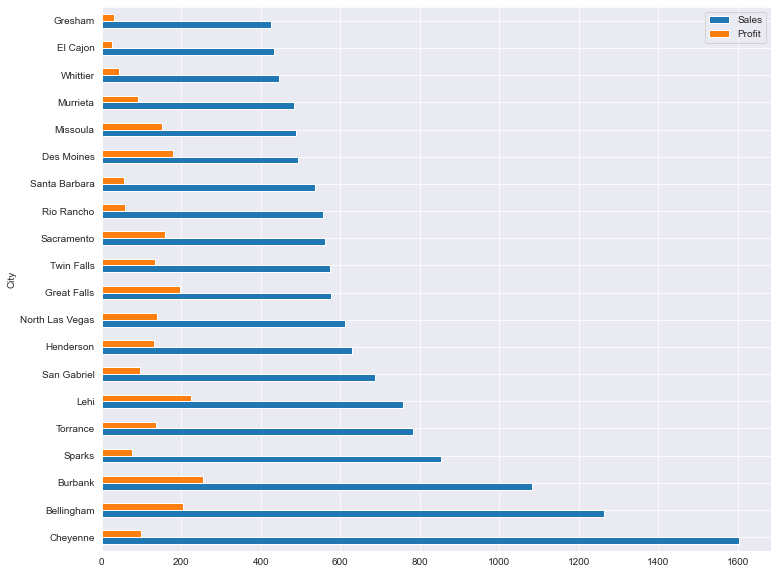

In [ ]:
city_df = df.groupby('City', as_index=False).mean()

city_df = city_df.sort_values('Sales' , ascending=False , ignore_index=True)
city_df = city_df.head(20)

sales_df = city_df[['City','Sales','Profit']]
sales_df.plot.barh(x='City' , figsize=(12,10))

* we don't have any loss in top 20 cities in terms of sales

* We analysed on the basis of State, Category, City.. **Now we can analyse on the basis of Month, Year and Quarter**

In [ ]:
df.head()

,Order ID,Order Date,Ship Date,processing_time,O_day,O_month,O_Year,O_quarter,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,2013-06-13,2013-06-17,4,13,6,2013,Q2,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,2011-06-09,2011-06-14,5,9,6,2011,Q2,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,2011-06-09,2011-06-14,5,9,6,2011,Q2,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97
3,CA-2011-115812,2011-06-09,2011-06-14,5,9,6,2011,Q2,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,CA-2011-115812,2011-06-09,2011-06-14,5,9,6,2011,Q2,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='O_Year'>

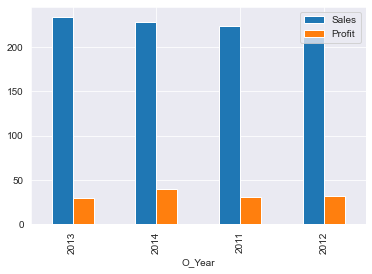

In [ ]:
#Create a dataframe that contains average of sales and profit each year

year_df = df.groupby('O_Year' , as_index=False)['Sales','Profit'].mean()
year_df = year_df.sort_values('Sales' , ascending=False , ignore_index=True)
year_df.plot.bar(x='O_Year')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='O_month'>

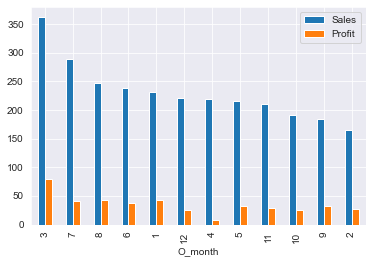

In [ ]:
month_df=df.groupby('O_month',as_index=False)['Sales','Profit'].mean()
month_df=month_df.sort_values('Sales',ascending=False,ignore_index=True)
month_df.plot.bar(x='O_month')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='O_month'>

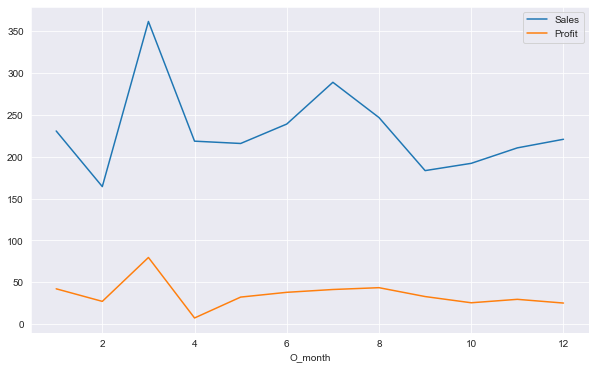

In [ ]:
month_df=df.groupby('O_month',as_index=False)['Sales','Profit'].mean()
month_df.plot.line(x='O_month',figsize=(10,6))

**Sales and profit of each category yearwise**

In [ ]:
list(sales_category_year.iterrows())

[(2011,
  Category
  Accessories     162.295455
  Appliances      144.441923
  Art              55.405082
  Binders         164.091899
  Bookcases       436.328000
  Chairs          465.368913
  Copiers        1499.975000
  Envelopes        54.799167
  Fasteners        13.840000
  Furnishings      74.107119
  Labels           36.489167
  Machines        583.351667
  Paper            61.913333
  Phones          454.268462
  Storage         271.889667
  Supplies        486.233158
  Tables          710.329600
  Name: 2011, dtype: float64),
 (2012,
  Category
  Accessories     209.328824
  Appliances      286.117778
  Art              42.395417
  Binders          44.187500
  Bookcases       445.420000
  Chairs          578.049268
  Copiers        1251.635000
  Envelopes        90.362667
  Fasteners         9.967857
  Furnishings     116.373971
  Labels           39.140000
  Machines       1196.030000
  Paper            58.217766
  Phones          356.538462
  Storage         312.163333
  S

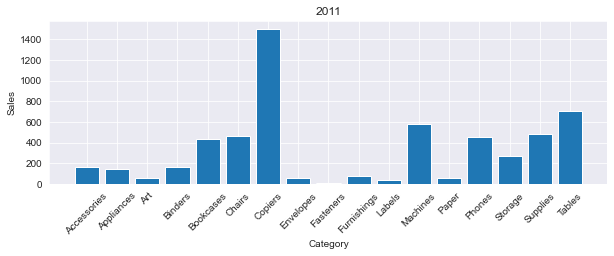

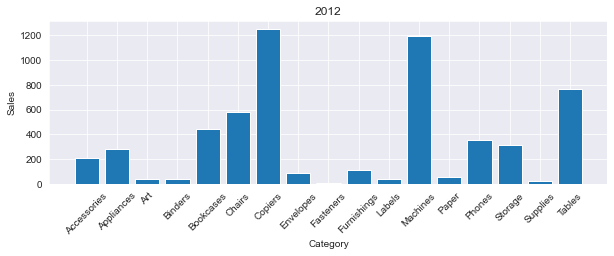

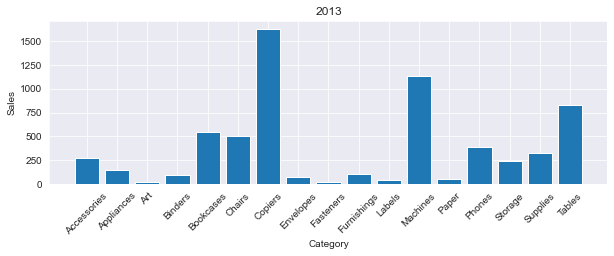

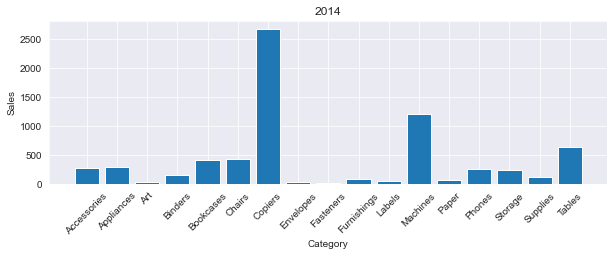

In [ ]:
#Sales of each category yearwise

sales_category_year=df.groupby(['O_Year','Category'])['Sales'].mean()
sales_category_year=sales_category_year.unstack()
sales_category_year
for year,data in sales_category_year.iterrows():
    fig,ax=plt.subplots(figsize=(10,3))
    ax.bar(x=data.index,height=data.values)
    ax.set_title(year)

    ax.set_xlabel('Category')
    ax.set_ylabel('Sales')

    plt.xticks(rotation=45)
    plt.show()

In [ ]:
year_category_sales = df.groupby(['Category' , 'O_Year'])['Sales'].mean().unstack()
data_ys = year_category_sales.reset_index()
data_ys

O_Year,Category,2011,2012,2013,2014
0,Accessories,162.295455,209.328824,276.471786,271.142292
1,Appliances,144.441923,286.117778,142.892857,286.550000
2,Art,55.405082,42.395417,25.374773,27.637938
3,Binders,164.091899,44.187500,90.226496,160.169581
4,Bookcases,436.328000,445.420000,547.807333,409.942414
5,Chairs,465.368913,578.049268,503.668387,438.740172
6,Copiers,1499.975000,1251.635000,1629.968333,2678.150909
7,Envelopes,54.799167,90.362667,77.930000,27.323500
8,Fasteners,13.840000,9.967857,17.581333,10.570870
9,Furnishings,74.107119,116.373971,109.697324,94.325189


<AxesSubplot:xlabel='Category'>

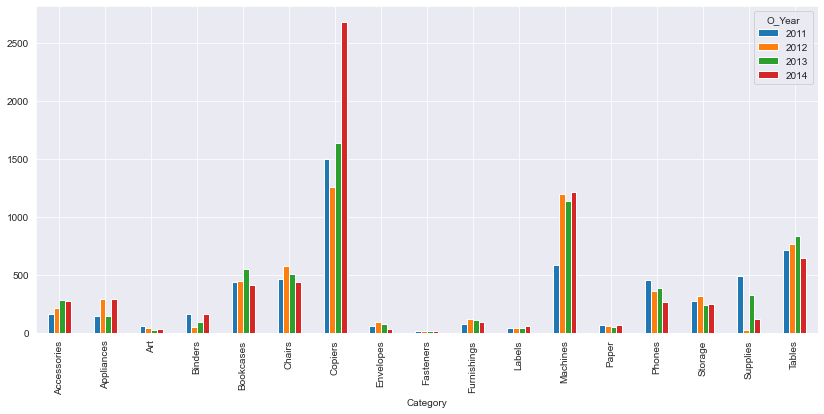

In [ ]:
data_ys.plot.bar(x='Category' , figsize=(14,6))

In [ ]:
year_category_profit = df.groupby(['Category' , 'O_Year'])['Profit'].mean().unstack()
data_yp = year_category_profit.reset_index().fillna(0)
data_yp

O_Year,Category,2011,2012,2013,2014
0,Accessories,35.230909,61.759020,70.934821,77.342292
1,Appliances,41.034615,70.124815,41.734000,80.006875
2,Art,12.332787,11.317708,7.303864,7.806495
3,Binders,32.083544,11.664773,27.797080,52.260359
4,Bookcases,3.224000,-47.154762,21.725333,-35.534138
5,Chairs,26.775870,23.718293,19.356290,10.748103
6,Copiers,568.490000,466.738333,554.490000,1096.627273
7,Envelopes,24.383333,41.810667,36.915000,12.532500
8,Fasteners,3.960000,3.632857,4.231333,3.550435
9,Furnishings,17.828475,27.945294,29.633239,24.388113


<AxesSubplot:xlabel='Category'>

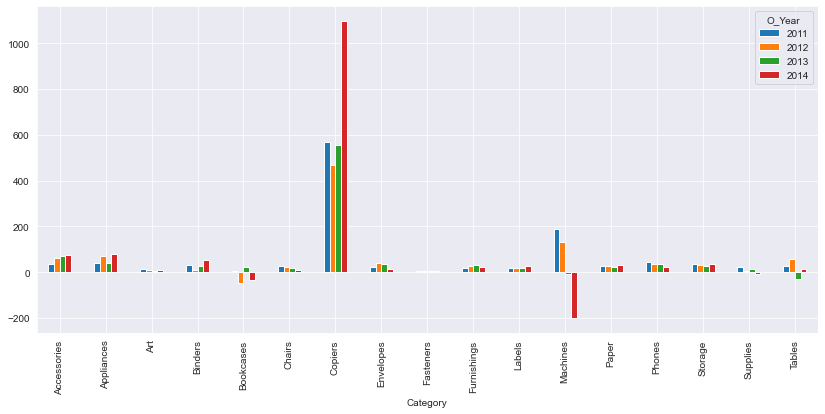

In [ ]:
data_yp.plot.bar(x='Category' , figsize=(14,6))

In [ ]:
data_yp.head()

O_Year,Category,2011,2012,2013,2014
0,Accessories,35.230909,61.759020,70.934821,77.342292
1,Appliances,41.034615,70.124815,41.734000,80.006875
2,Art,12.332787,11.317708,7.303864,7.806495
3,Binders,32.083544,11.664773,27.797080,52.260359
4,Bookcases,3.224000,-47.154762,21.725333,-35.534138


<AxesSubplot:>

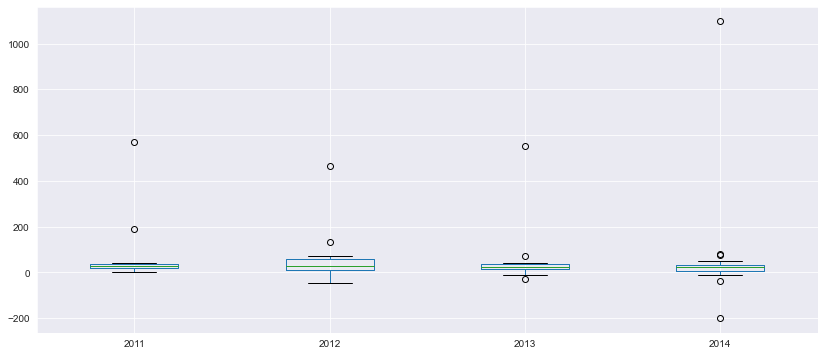

In [ ]:
data_yp.plot.box(x='Category' , figsize=(14,6))

* Quartely Sales and Profit

In [ ]:
df.head()

,Order ID,Order Date,Ship Date,processing_time,O_day,O_month,O_Year,O_quarter,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,2013-06-13,2013-06-17,4,13,6,2013,Q2,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,2011-06-09,2011-06-14,5,9,6,2011,Q2,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,2011-06-09,2011-06-14,5,9,6,2011,Q2,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97
3,CA-2011-115812,2011-06-09,2011-06-14,5,9,6,2011,Q2,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,CA-2011-115812,2011-06-09,2011-06-14,5,9,6,2011,Q2,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='O_quarter'>

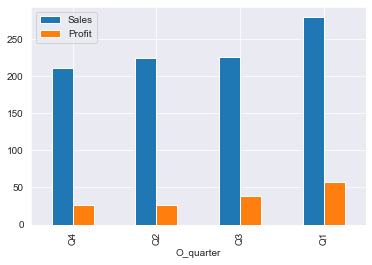

In [ ]:
quarterly_df = df.groupby('O_quarter' , as_index=False)['Sales','Profit'].mean()
quarterly_df = quarterly_df.sort_values('Sales')
quarterly_df.plot.bar(x='O_quarter')

<AxesSubplot:xlabel='O_quarter'>

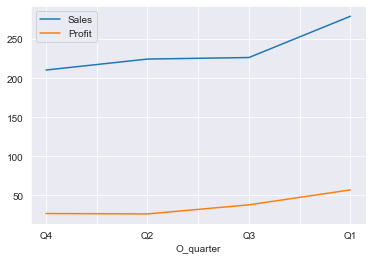

In [ ]:
quarterly_df.plot.line(x='O_quarter')

* Quarterly Sales for each category

<AxesSubplot:xlabel='Category'>

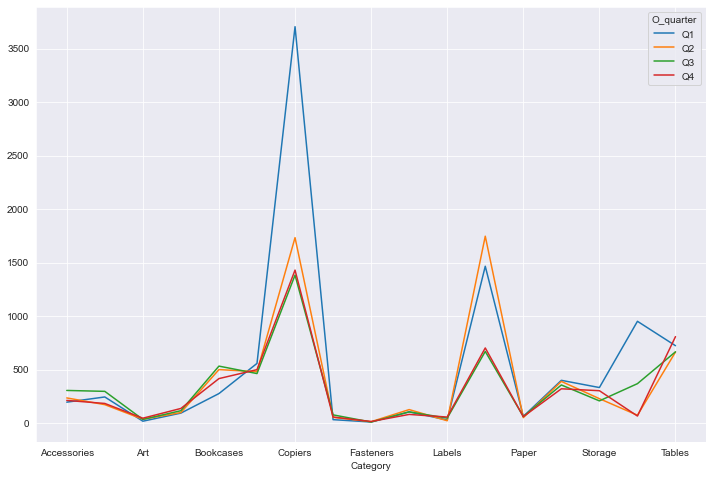

In [ ]:
quarter_category_sales = df.groupby(['Category',
                                     'O_quarter'])['Sales'].mean().unstack().reset_index()
quarter_category_sales.plot.line(x='Category',figsize=(12,8))

<AxesSubplot:xlabel='Category'>

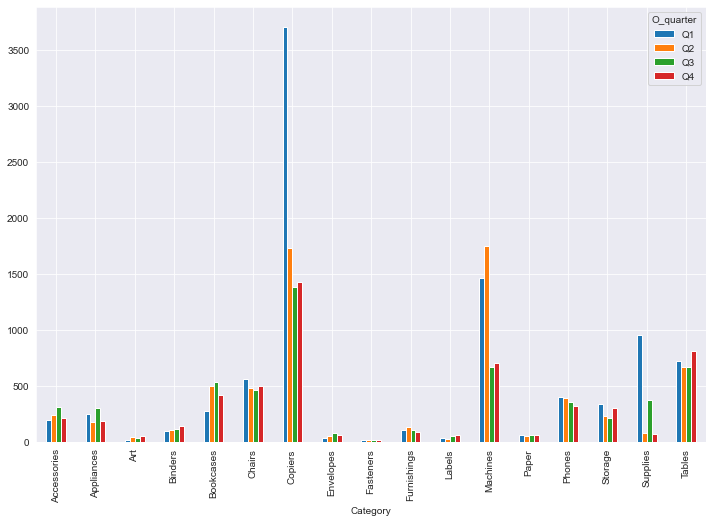

In [ ]:
quarter_category_sales.plot.bar(x='Category',figsize=(12,8))

* Quartely Profits for each category

<AxesSubplot:xlabel='Category'>

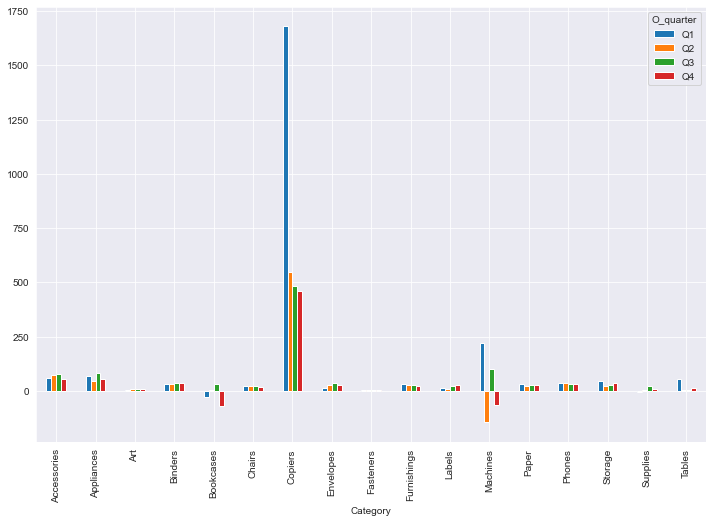

In [ ]:
quarter_category_profit = df.groupby(['Category',
                                     'O_quarter'])['Profit'].mean().unstack().reset_index()
quarter_category_profit.plot.bar(x='Category',figsize=(12,8))

* Sales of Each Quarters in Different Years

<AxesSubplot:xlabel='O_quarter'>

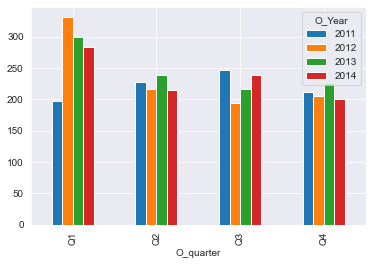

In [ ]:
quarter_year_sales=df.groupby(['O_quarter','O_Year'])['Sales'].mean().unstack().reset_index()
quarter_year_sales
quarter_year_sales.plot.bar(x='O_quarter')

<AxesSubplot:xlabel='O_Year'>

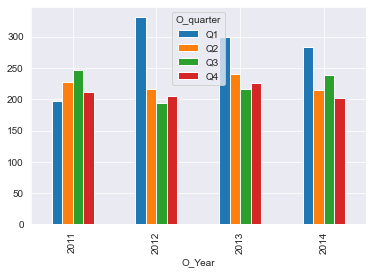

In [ ]:
quarter_year_sales=df.groupby(['O_Year','O_quarter'])['Sales'].mean().unstack().reset_index()
quarter_year_sales
quarter_year_sales.plot.bar(x='O_Year')

* Average Sales in each quarter in each state

<AxesSubplot:xlabel='State'>

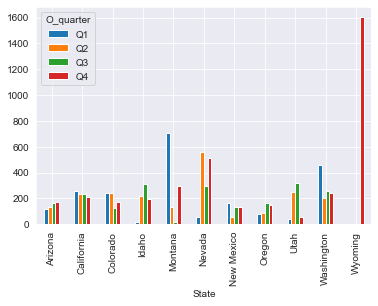

In [ ]:
quarter_state_sales=df.groupby(['State','O_quarter'])['Sales'].mean().unstack().reset_index().fillna(0)
quarter_state_sales
quarter_state_sales.plot.bar(x='State')

<AxesSubplot:xlabel='O_quarter'>

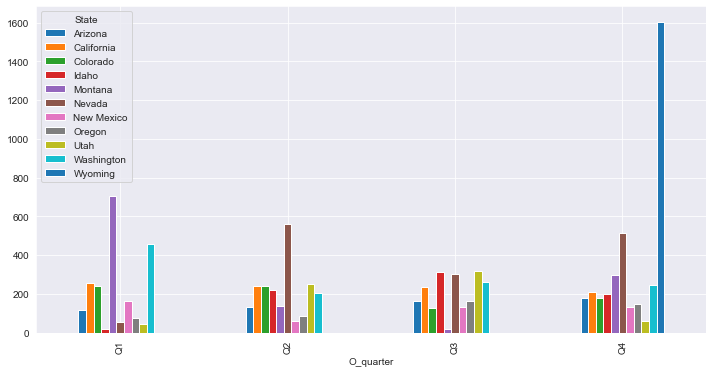

In [ ]:
quarter_state_sales=df.groupby(['O_quarter','State'])['Sales'].mean().unstack().reset_index().fillna(0)
quarter_state_sales
quarter_state_sales.plot.bar(x='O_quarter',figsize=(12,6))

* Calculate Profit or Loss

In [ ]:
df['p/l'] = df['Profit'].apply(lambda x : 'r' if x < 0 else 'y' if x == 0 else 'g')

In [ ]:
df.head()

,Order ID,Order Date,Ship Date,processing_time,O_day,O_month,O_Year,O_quarter,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit,p/l
0,CA-2013-138688,2013-06-13,2013-06-17,4,13,6,2013,Q2,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,g
1,CA-2011-115812,2011-06-09,2011-06-14,5,9,6,2011,Q2,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,g
2,CA-2011-115812,2011-06-09,2011-06-14,5,9,6,2011,Q2,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97,g
3,CA-2011-115812,2011-06-09,2011-06-14,5,9,6,2011,Q2,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72,g
4,CA-2011-115812,2011-06-09,2011-06-14,5,9,6,2011,Q2,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78,g


<AxesSubplot:xlabel='Sales', ylabel='Profit'>

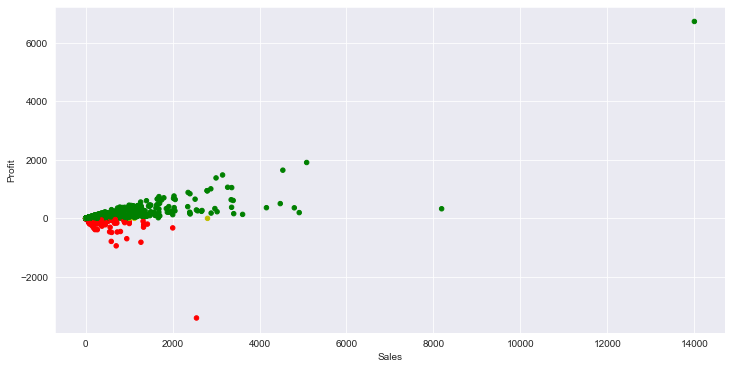

In [ ]:
df[['Sales','Profit' , 'p/l']].plot.scatter(x = 'Sales' , y = 'Profit' ,
                                            c = 'p/l' , figsize=(12,6))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:xlabel='Sales', ylabel='Profit'>

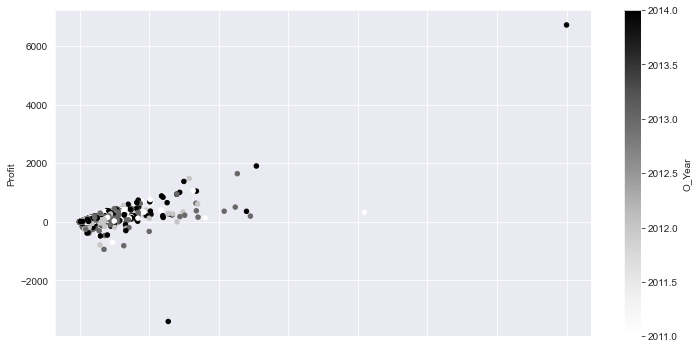

In [ ]:
df[['Sales','Profit' , 'O_Year']].plot.scatter(x = 'Sales' , y = 'Profit' ,
                                            c = 'O_Year' , figsize=(12,6))

<AxesSubplot:xlabel='Quantity'>

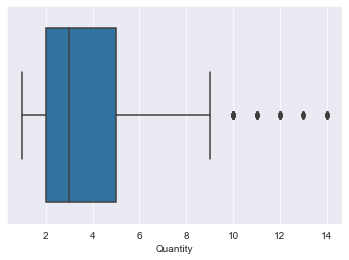

In [ ]:
sns.boxplot(x=df['Quantity'])